## Avocado Project

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.model_selection import cross_val_score,GridSearchCV 


import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df=pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
print("Number of rows and columns in our data set is", df.shape)

Number of rows and columns in our data set is (18249, 14)


In [4]:
# dropping duplicate values
df.drop_duplicates()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

No duplicate values available in our dataset


 The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it now !


In [5]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
#Lets check our data head again to make sure that the Feature Unnamed:0 is removed
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [7]:
#check for columns

df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
df.info()
# This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
# here we can see the objectdatatype of Datecolumn so we need to converts its datatype from object to date type

df['Date'] =pd.to_datetime(df['Date'])

In [10]:
df['Date'].dtype

dtype('<M8[ns]')

In [11]:
#chekin gfor null values
df.isnull().sum()


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### No null values in our dataset.

In [12]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

### Observations: 

1-columns 4046,4225,4770,Total Bags	,small bags,Large Bags,XLarge Bags contains 0 as min values.


In [13]:
### Exporing each column

In [14]:
print(f"No. of unique columns in Date Column:",df['Date'].nunique())
print(df['Date'].value_counts())

No. of unique columns in Date Column: 169
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


In [15]:
print(f"No. of unique columns in AveragePrice Column:",df['AveragePrice'].nunique())
print(df['AveragePrice'].value_counts())

No. of unique columns in AveragePrice Column: 259
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


In [16]:
print(f"No. of unique columns in 4046 Column:",df['4046'].nunique())
print(df['4046'].value_counts())

No. of unique columns in 4046 Column: 17702
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


In [17]:
print(f"No. of unique columns in 4225 Column:",df['4225'].nunique())
print(df['4225'].value_counts())

No. of unique columns in 4225 Column: 18103
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64


In [18]:
print(f"No. of unique columns in 4770 Column:",df['4770'].nunique())
print(df['4770'].value_counts())

No. of unique columns in 4770 Column: 12071
0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: 4770, Length: 12071, dtype: int64


In [19]:
print(f"No. of unique columns in Total Bags Column:",df['Total Bags'].nunique())
print(df['Total Bags'].value_counts())

No. of unique columns in Total Bags Column: 18097
0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: Total Bags, Length: 18097, dtype: int64


In [20]:
print(f"No. of unique columns in Small Bags Column:",df['Small Bags'].nunique())
print(df['Small Bags'].value_counts())

No. of unique columns in Small Bags Column: 17321
0.00        159
203.33       11
223.33       10
533.33       10
123.33        8
           ... 
14002.00      1
32441.00      1
29560.96      1
22077.20      1
11988.14      1
Name: Small Bags, Length: 17321, dtype: int64


In [21]:
print(f"No. of unique columns in Large Bags Column:",df['Large Bags'].nunique())
print(df['Large Bags'].value_counts())

No. of unique columns in Large Bags Column: 15082
0.00          2370
3.33           187
6.67            78
10.00           47
4.44            38
              ... 
2528089.14       1
2287449.76       1
731388.25        1
673464.14        1
26.01            1
Name: Large Bags, Length: 15082, dtype: int64


In [21]:
print(f"No. of unique columns in XLarge Bags Column:",df['XLarge Bags'].nunique())
print(df['XLarge Bags'].value_counts())

No. of unique columns in XLarge Bags Column: 5588
0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64


In [22]:
print(f"No. of unique columns in Type Column:",df['type'].nunique())
print(df['type'].value_counts())

No. of unique columns in Type Column: 2
conventional    9126
organic         9123
Name: type, dtype: int64


In [23]:
print(f"No. of unique columns in Year Column:",df['year'].nunique())
print(df['year'].value_counts())

No. of unique columns in Year Column: 4
2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


In [24]:
print(f"No. of unique columns in Region Column:",df['region'].nunique())
print(df['region'].value_counts())

No. of unique columns in Region Column: 54
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte   

• From above we can see no. of unique columns present in each column and the count of each value in it.


In [25]:
#Seeing the no. of rows of years data for each type.
df_type=df.groupby('type')['year'].value_counts()
df_type
     

type          year
conventional  2017    2862
              2015    2808
              2016    2808
              2018     648
organic       2017    2860
              2016    2808
              2015    2807
              2018     648
Name: year, dtype: int64

From above we can see that, for each type of avocado the data wrt different years provided is almost same.



In [26]:
#Seeing max. no. of avocados with different PLU'S sold per year
sale_year=df.groupby('year')['AveragePrice'].mean()
sale_year

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

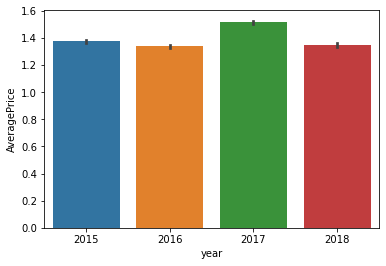

In [27]:
## Visualising the same
sns.barplot(x='year',y='AveragePrice',data=df,label=True)


The highest average of averageprice is sold in the year 2017, we can clearly see this in above garph.



In [28]:
#Seeing max. no. of avocados with different PLU'S sold per year
year_sale=df.groupby('year')['4046','4225','4770','AveragePrice'].max()
year_sale

4046         4225        4770  AveragePrice
year                                                    
2015  18933038.04  18956479.74  1614282.73          2.79
2016  16573573.78  20470572.61  2546439.11          3.25
2017  22743616.17  20328161.55  1664383.09          3.17
2018  21620180.90  20445501.03  1066830.22          2.30

In [29]:
#Seeing min. no. of avocados with different PLU'S sold per year
year_sale=df.groupby('year')['4046','4225','4770','AveragePrice','type'].min()
year_sale
     

4046  4225  4770  AveragePrice          type
year                                              
2015   0.0   0.0   0.0          0.49  conventional
2016   0.0   0.0   0.0          0.51  conventional
2017   0.0   0.0   0.0          0.44  conventional
2018   0.0   6.6   0.0          0.56  conventional

In [30]:

type_vol=df.pivot_table(index='year',columns=['type'],values=['Total Volume','AveragePrice'])
type_vol

AveragePrice            Total Volume              
type conventional   organic  conventional       organic
year                                                   
2015     1.077963  1.673324  1.530128e+06  31659.931012
2016     1.105595  1.571684  1.670317e+06  46524.244580
2017     1.294888  1.735521  1.665327e+06  58790.176864
2018     1.127886  1.567176  2.058960e+06  74895.480139

In [31]:
region_sale=df.pivot_table(index='region',columns=['year','type'],values=['Total Volume','AveragePrice'])
region_sale

AveragePrice                                   \
year                        2015                   2016             
type                conventional   organic conventional   organic   
region                                                              
Albany                  1.171923  1.905577     1.345769  1.722115   
Atlanta                 1.052308  1.708846     0.972885  1.455385   
BaltimoreWashington     1.168077  1.569615     1.356538  1.818654   
Boise                   1.054038  1.693462     0.878269  1.405577   
Boston                  1.144038  1.803077     1.263077  1.589231   
BuffaloRochester        1.403462  1.685769     1.330192  1.637500   
California              1.020385  1.611346     1.046154  1.613654   
Charlotte               1.148462  2.003077     1.255962  1.739808   
Chicago                 1.153654  1.654423     1.331154  1.763462   
CincinnatiDayton        0.977115  1.427500     0.948846  1.227885   
Columbus                1.008077  1.539615     1.049231  1.323462   
DallasFtWorth           0.781923  1.373846     0.827308  1.165000   
Denver                  1.048654  1.326923     0.958654  1.227692   
Detroit                 1.047115  1.629423     1.092115  1.252692   
GrandRapids             1.086923  1.745769     1.294038  1.724615   
GreatLakes              1.077692  1.574808     1.141923  1.412115   
HarrisburgScranton      1.145769  1.797500     1.232500  1.790769   
HartfordSpringfield     1.242885  2.252692     1.409038  2.293077   
Houston                 0.792500  1.303654     0.830769  1.153077   
Indianapolis            1.104615  1.581346     1.118077  1.485000   
Jacksonville            1.120962  1.885192     1.059808  1.675577   
LasVegas                0.967115  1.770577     0.956731  1.748077   
LosAngeles              0.895962  1.409038     0.890192  1.277308   
Louisville              1.043269  1.545577     1.056731  1.366346   
MiamiFtLauderdale       1.141154  1.625962     1.157115  1.402500   
Midsouth                1.119615  1.583077     1.185962  1.515769   
Nashville               1.010192  1.544231     0.984423  1.247885   
NewOrleansMobile        0.984423  1.550962     1.024231  1.473077   
NewYork                 1.255000  2.034038     1.385962  2.138077   
Northeast               1.214808  1.872692     1.319423  1.871923   
NorthernNewEngland      1.113077  1.833654     1.226538  1.558846   
Orlando                 1.132500  1.866154     1.109423  1.632115   
Philadelphia            1.284615  1.825769     1.376923  1.972692   
PhoenixTucson           0.659808  1.654423     0.724231  1.793269   
Pittsburgh              1.262692  1.551731     1.238269  1.448462   
Plains                  1.077308  1.798462     1.127692  1.627308   
Portland                1.054038  1.559615     0.916538  1.466731   
RaleighGreensboro       1.140577  1.758269     1.198269  1.697308   
RichmondNorfolk         1.047692  1.501346     1.075385  1.346923   
Roanoke                 1.062115  1.392115     1.043269  1.251731   
Sacramento              1.170577  1.737500     1.242885  2.093462   
SanDiego                0.981346  1.567115     0.969038  1.658462   
SanFrancisco            1.299423  1.942692     1.408462  2.354038   
Seattle                 1.134423  1.710000     1.027115  1.573462   
SouthCarolina           1.065577  1.843846     1.085000  1.525000   
SouthCentral            0.812115  1.411923     0.858269  1.195577   
Southeast               1.084231  1.745192     1.071154  1.502692   
Spokane                 1.095385  1.705385     1.027500  1.639615   
StLouis                 1.203269  1.803462     0.993654  1.377308   
Syracuse                1.336346  1.721731     1.372115  1.634808   
Tampa                   1.086731  1.626538     1.098269  1.430769   
TotalUS                 1.012500  1.502308     1.046731  1.480385   
West                    0.940000  1.535577     0.915769  1.445962   
WestTexNewMexico        0.771538  1.756667     0.846538  1.646731   

                 

In [32]:
region_sale.max()

              year  type        
AveragePrice  2015  conventional    1.403462e+00
                    organic         2.252692e+00
              2016  conventional    1.409038e+00
                    organic         2.354038e+00
              2017  conventional    1.606226e+00
                    organic         2.403208e+00
              2018  conventional    1.423333e+00
                    organic         1.971667e+00
Total Volume  2015  conventional    3.122473e+07
                    organic         6.455636e+05
              2016  conventional    3.404345e+07
                    organic         9.403799e+05
              2017  conventional    3.399566e+07
                    organic         1.187239e+06
              2018  conventional    4.212553e+07
                    organic         1.510488e+06
dtype: float64

Based on region : highest price, volume sold wrt type of avocado in different years can be seen



In [33]:
region_sale.min()

              year  type        
AveragePrice  2015  conventional        0.659808
                    organic             1.303654
              2016  conventional        0.724231
                    organic             1.153077
              2017  conventional        0.809623
                    organic             1.332453
              2018  conventional        0.682500
                    organic             1.205833
Total Volume  2015  conventional    51195.638462
                    organic          1289.274038
              2016  conventional    63851.101346
                    organic          1784.067885
              2017  conventional    66619.476226
                    organic          2761.867170
              2018  conventional    81560.827500
                    organic          2650.320833
dtype: float64

In [34]:
### Cheking in which reagion AvergaePrice are very high

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

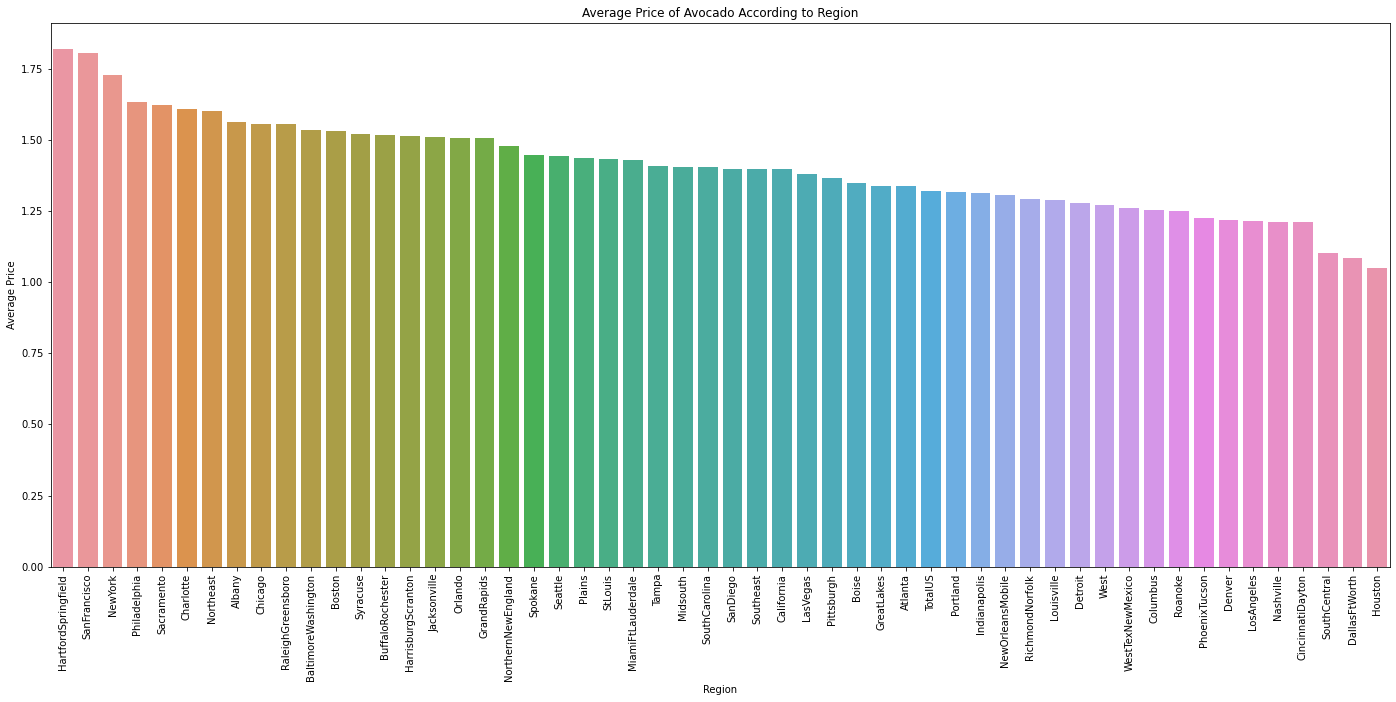

In [35]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

from above graph we can clearly say that top 5 ragions are where averageprice are very high:

HartfordSpringfield

SanFrancisco

NewYork

Philadelphia

Sacramento

#### We got some object data type we need to convert them into int/float data type

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
print("Before conversion Year column",df['year'].value_counts())

Before conversion Year column 2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


In [38]:
le=LabelEncoder()
df['year']=le.fit_transform(df['year'])

In [39]:
print("After conversion Year column",df['year'].value_counts())

After conversion Year column 2    5722
1    5616
0    5615
3    1296
Name: year, dtype: int64


In [40]:
print("Before conversion Region column",df['region'].value_counts())

Before conversion Region column Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              

In [41]:
df['region']=le.fit_transform(df['region'])

In [42]:
print("Before conversion Region column",df['region'].value_counts())

Before conversion Region column 0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64


In [43]:
## Cheking again datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(1), int64(1), object(1)
memory usage: 1.7+ MB


In [44]:
## Adding 2 new column in the dataset 
df['Month']=df['Date'].apply(lambda x:x.month)
#df['Day']=df['Date'].apply(lambda x:x.day)

In [45]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [46]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional     0   
1     9505.56     9408.07       97.49          0.0  conventional     0   
2     8145.35     8042.21      103.14          0.0  conventional     0   
3     5811.16     5677.40      133.76          0.0  conventional     0   
4     6183.95     5986.26      197.69          0.0  conventional     0   

   region  Month  
0       0     12  
1       0     12  
2       0     12  
3       0     12  
4       0     11

In [47]:
### Dropping the Date column as we have aready added month column and year column is already present in the dataset.
df.drop('Date',axis=1,inplace=True)

In [48]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month'],
      dtype='object')

In [49]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
dtype: int64

In [50]:

#Converting the df type into encoding
print("before Conversion type Column\n",df['type'].value_counts())
df['type']=le.fit_transform(df['type'])
     

before Conversion type Column
 conventional    9126
organic         9123
Name: type, dtype: int64


In [51]:
print("After Conversion type Column\n",df['type'].value_counts())


After Conversion type Column
 0    9126
1    9123
Name: type, dtype: int64


In [52]:
### Cheking for skewness 
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
dtype: float64

#### Skewness is present in every column in every column except AvergaePrice,type,year,region and month.

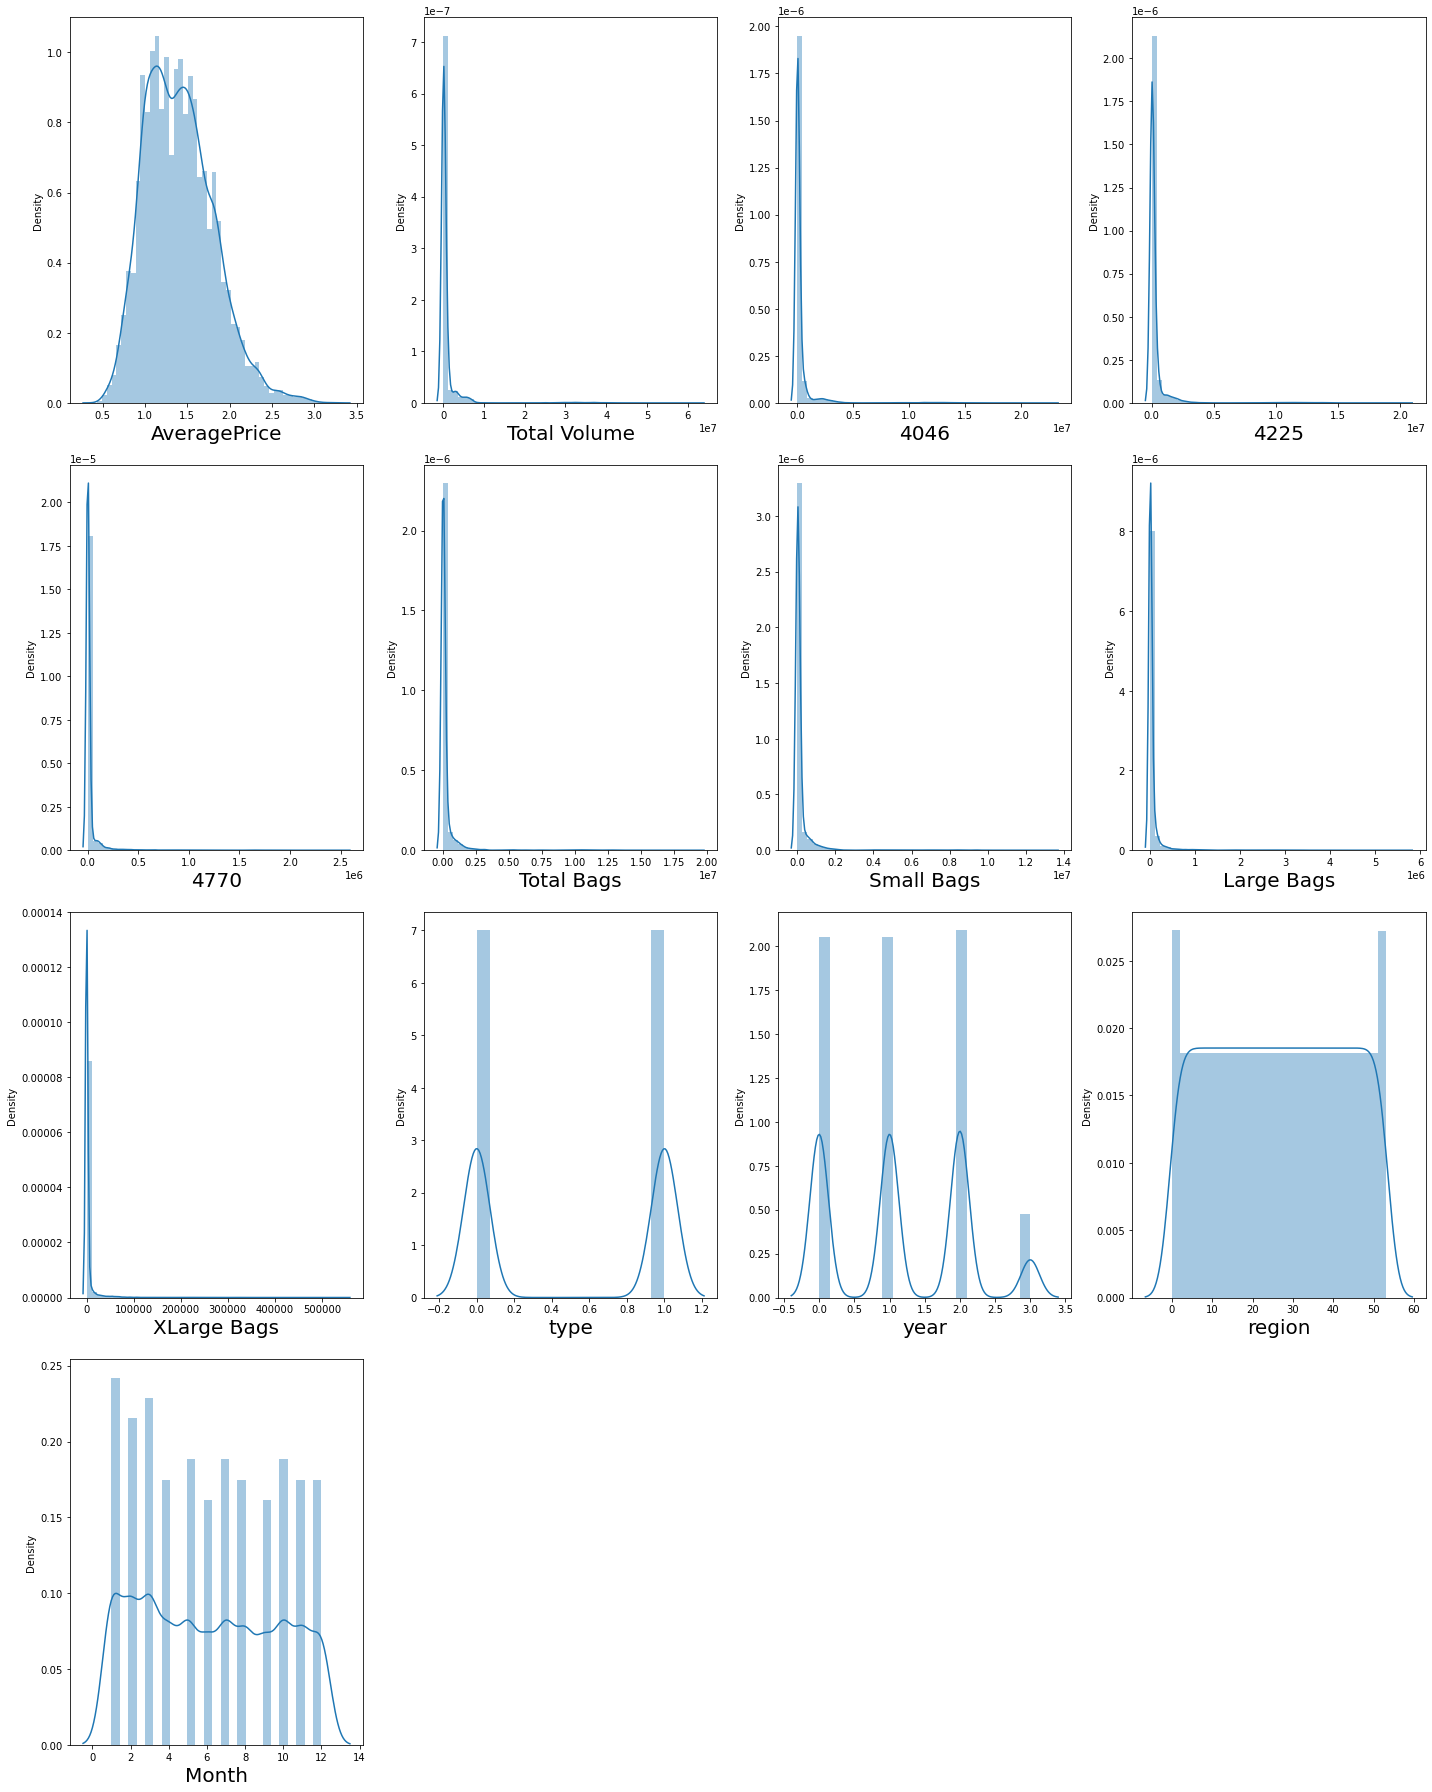

In [53]:
plt.figure(figsize=(20,25))
plot_number=1

for column in df:
    if plot_number<=15: 
        ax=plt.subplot(4,4,plot_number)
        sns.distplot(df[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()

### Checking for outlier using boxplot


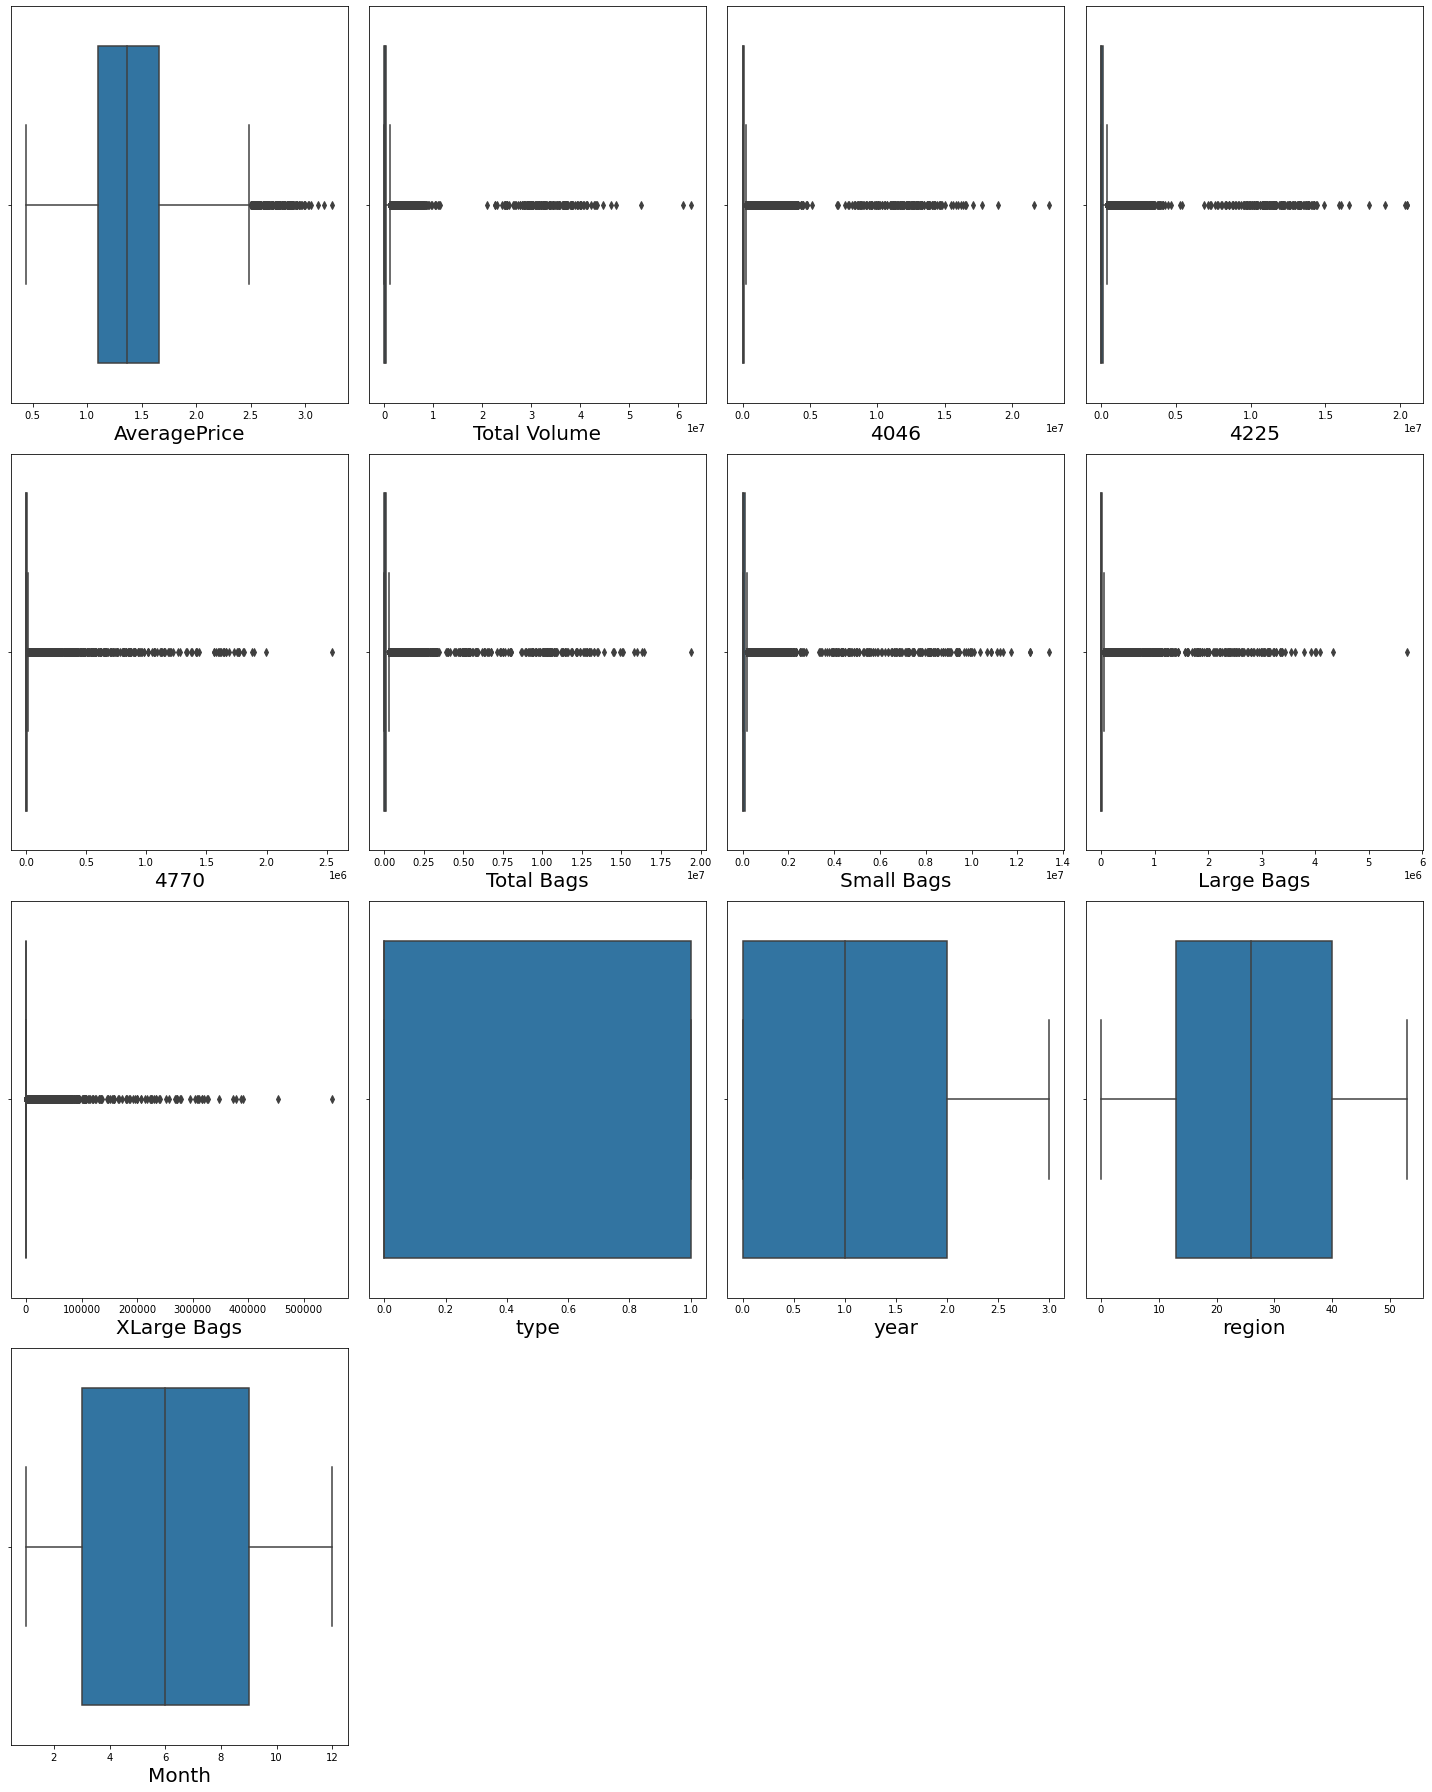

In [54]:
plt.figure(figsize=(20,25))
plot_number=1

for column in df:
    if plot_number<=15: 
        ax=plt.subplot(4,4,plot_number)
        sns.boxplot(df[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()

### Removing  outliers using zscore

In [55]:
from scipy.stats import zscore

In [56]:
z=np.abs(zscore(df))
z

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      type      year    region  \
0        0.232647    0.222352      0.17558  0.999836  1.221282  1.700252   
1        0.231568    0.222335      0.17558  0.999836  1.221282  1.700252   
2        0.233399    0.222311      0.17558  0.999836  1.221282  1.700252   
3        0.236568    0.222186      0.17558  0.999836  1.221282  1.700252   
4        0.236154    0.221924      0.17558  0.999836  1.221282  1.700252   
...           ...         ...          ...       ...       ...       ...   
18244    0.226665    0.220964      0.17558  1.000164  1.970504  1.700811   
18245    0.232196    0.221403      0.17558  1.000164  1.970504  1.700811   
18246    0.231644    0.222561      0.17558  1.000164  1.970504  1.700811   
18247    0.229543    0.222529      0.17558  1.000164  1.970504  1.700811   
18248    0.228111    0.222628      0.17558  1.000164  1.970504  1.700811   

          Month  
0      1.647632  
1      1.647632  
2      1.647632  
3      1.647632  
4      1.364669  
...         ...  
18244  1.181997  
18245  1.464959  
18246  1.464959  
18247  1.464959  
18248  1.464959  

[18249 rows x 13 columns]

In [57]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new.shape

(17651, 13)

In [58]:
dataloss=(18249-17651)/18249

In [59]:
print("Shape of dataset with outliers",df.shape)
print("Shape of dataset without outliers",df_new.shape)


Shape of dataset with outliers (18249, 13)
Shape of dataset without outliers (17651, 13)


In [60]:
print("DataLoss after using zscore method is : ",dataloss)

DataLoss after using zscore method is :  0.03276891884486821


In [61]:
# Agian checking for skewness
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

In [63]:
### Skewness is still available in every columns except AveragePrice,type,year,region,month.

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

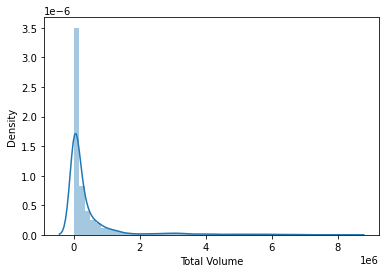

In [62]:
sns.distplot(df_new['Total Volume'])


In [63]:
# using np.log method to remove skewness
df_new['Total Volume']=np.log(df_new['Total Volume'])

-0.05009236689694154


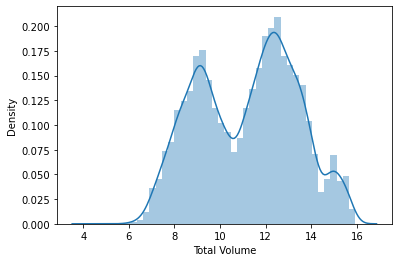

In [64]:
sns.distplot(df_new['Total Volume'])
print(df_new['Total Volume'].skew())

#### While observing the dataset we observed that our few columns 4046,4225,4770,Total Bags ,small bags,Large Bags,XLarge Bags contains 0 as min values. So we need to add constant in order to apply np.log method

In [65]:
df_new.describe()

AveragePrice  Total Volume          4046          4225           4770  \
count  17651.000000  17651.000000  1.765100e+04  1.765100e+04   17651.000000   
mean       1.405363     11.205144  1.546436e+05  1.656009e+05   11160.558411   
std        0.385793      2.177105  4.395780e+05  3.991041e+05   34488.049314   
min        0.440000      4.437461  0.000000e+00  0.000000e+00       0.000000   
25%        1.110000      9.265445  8.219250e+02  2.889740e+03       0.000000   
50%        1.380000     11.514995  7.785240e+03  2.670378e+04     163.960000   
75%        1.660000     12.876934  9.840492e+04  1.288019e+05    5284.600000   
max        2.610000     15.939268  4.085859e+06  3.894802e+06  344488.510000   

         Total Bags    Small Bags     Large Bags   XLarge Bags          type  \
count  1.765100e+04  1.765100e+04   17651.000000  17651.000000  17651.000000   
mean   1.298160e+05  1.006283e+05   27830.325482   1357.351712      0.509433   
std    2.821081e+05  2.295134e+05   73026.707330   5240.345626      0.499925   
min    0.000000e+00  0.000000e+00       0.000000      0.000000      0.000000   
25%    4.959780e+03  2.746415e+03     112.660000      0.000000      0.000000   
50%    3.756260e+04  2.454157e+04    2448.660000      0.000000      1.000000   
75%    1.020218e+05  7.838981e+04   19089.250000     73.670000      1.000000   
max    2.782725e+06  2.348868e+06  781447.290000  55940.330000      1.000000   

               year        region         Month  
count  17651.000000  17651.000000  17651.000000  
mean       1.137669     26.103110      6.178347  
std        0.940239     15.396005      3.539935  
min        0.000000      0.000000      1.000000  
25%        0.000000     13.000000      3.000000  
50%        1.000000     26.000000      6.000000  
75%        2.000000     39.000000      9.000000  
max        3.000000     53.000000     12.000000

In [66]:
cols=df_new[['4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
for i in cols:
    df_new[i]=df_new[i]+1
df_new.describe()

AveragePrice  Total Volume          4046          4225           4770  \
count  17651.000000  17651.000000  1.765100e+04  1.765100e+04   17651.000000   
mean       1.405363     11.205144  1.546446e+05  1.656019e+05   11161.558411   
std        0.385793      2.177105  4.395780e+05  3.991041e+05   34488.049314   
min        0.440000      4.437461  1.000000e+00  1.000000e+00       1.000000   
25%        1.110000      9.265445  8.229250e+02  2.890740e+03       1.000000   
50%        1.380000     11.514995  7.786240e+03  2.670478e+04     164.960000   
75%        1.660000     12.876934  9.840592e+04  1.288029e+05    5285.600000   
max        2.610000     15.939268  4.085860e+06  3.894803e+06  344489.510000   

         Total Bags    Small Bags     Large Bags   XLarge Bags          type  \
count  1.765100e+04  1.765100e+04   17651.000000  17651.000000  17651.000000   
mean   1.298170e+05  1.006293e+05   27831.325482   1358.351712      0.509433   
std    2.821081e+05  2.295134e+05   73026.707330   5240.345626      0.499925   
min    1.000000e+00  1.000000e+00       1.000000      1.000000      0.000000   
25%    4.960780e+03  2.747415e+03     113.660000      1.000000      0.000000   
50%    3.756360e+04  2.454257e+04    2449.660000      1.000000      1.000000   
75%    1.020228e+05  7.839081e+04   19090.250000     74.670000      1.000000   
max    2.782726e+06  2.348869e+06  781448.290000  55941.330000      1.000000   

               year        region         Month  
count  17651.000000  17651.000000  17651.000000  
mean       1.137669     26.103110      6.178347  
std        0.940239     15.396005      3.539935  
min        0.000000      0.000000      1.000000  
25%        0.000000     13.000000      3.000000  
50%        1.000000     26.000000      6.000000  
75%        2.000000     39.000000      9.000000  
max        3.000000     53.000000     12.000000

<AxesSubplot:xlabel='4046', ylabel='Density'>

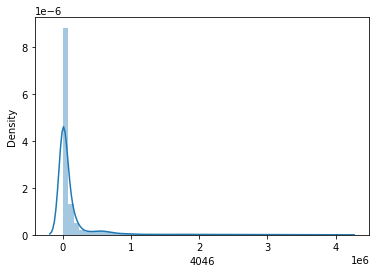

In [67]:
sns.distplot(df_new['4046'])

In [68]:
# Skewness handling in 4046 column
df_new['4046']=np.log(df_new['4046'])
print("After Skewness removal\n",df_new['4046'])

After Skewness removal
 0        6.944801
1        6.515127
2        6.679222
3        7.032624
4        6.848515
           ...   
18244    7.624599
18245    7.083975
18246    7.084159
18247    7.332127
18248    7.971006
Name: 4046, Length: 17651, dtype: float64


<AxesSubplot:xlabel='4046', ylabel='Density'>

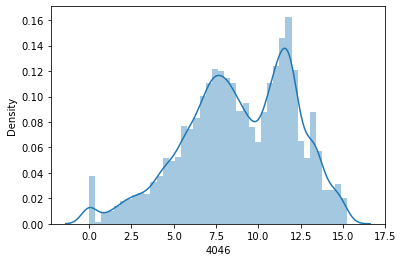

In [69]:
sns.distplot(df_new['4046'])

In [70]:
# Skewness handling in 4225 column
print("Skewness before np.log: ",df_new['4225'].skew())
df_new['4225']=np.log(df_new['4225'])


Skewness before np.log:  4.455745349647941


In [71]:
print("After Skewness removal:",df_new['4225'].skew())

After Skewness removal: -0.6046194551303906


<AxesSubplot:xlabel='4225', ylabel='Density'>

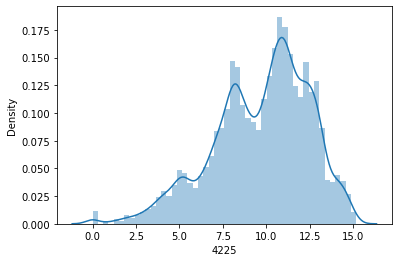

In [72]:
sns.distplot(df_new['4225'])

In [73]:
# Skewness handling in 4770 column
print("Before Np.log Skewness:",df_new['4770'].skew())

Before Np.log Skewness: 5.117169679810346


In [74]:

df_new['4770']=np.log(df_new['4770'])
print("After Skewness removal: ",df_new['4770'].skew())

After Skewness removal:  0.06853170194303994


<AxesSubplot:xlabel='4770', ylabel='Density'>

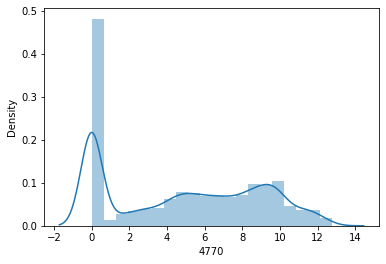

In [75]:
#visualising 
sns.distplot(df_new['4770'])

In [76]:
print("Before Np.log Skewness:",df_new['Small Bags'].skew())

Before Np.log Skewness: 4.222705587481023


In [77]:
# Skewness handling in Small Bags column
df_new['Small Bags']=np.log(df_new['Small Bags'])
print("After Skewness removal:",df_new['Small Bags'].skew())

After Skewness removal: -0.7889879508192367


<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

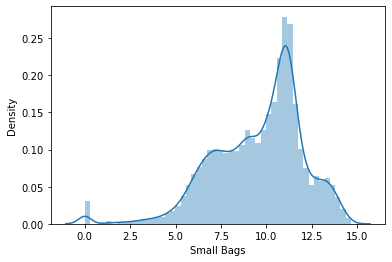

In [78]:
sns.distplot(df_new['Small Bags'])

Skewness before: 4.06677130442822


<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

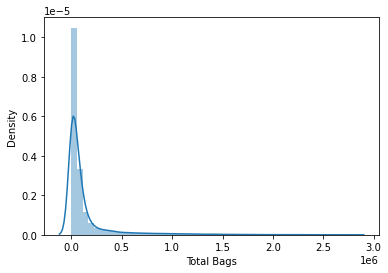

In [79]:
# Skewness handling in Total bags column
print("Skewness before:",df_new['Total Bags'].skew())
sns.distplot(df_new['Total Bags'])

In [80]:
# Skewness handling in Total bags column
df_new['Total Bags']=np.log(df_new['Total Bags'])
print("After Skewness removal:",df_new['Total Bags'].skew())

After Skewness removal: -0.3844927921821734


<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

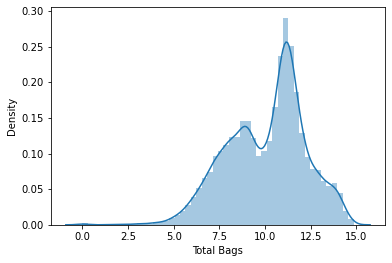

In [81]:
sns.distplot(df_new['Total Bags'])

SKewness before: 5.0534342348618075


<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

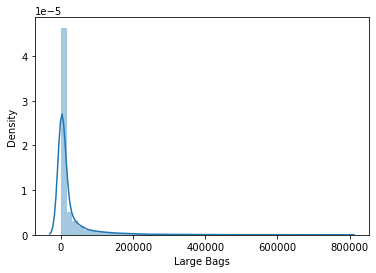

In [83]:
# Skewness handling in Large bags column
print("SKewness before:",df_new['Large Bags'].skew())
sns.distplot(df_new['Large Bags'])

In [84]:
df_new['Large Bags']=np.log(df_new['Large Bags'])
print("After Skewness removal:",df_new['Large Bags'].skew())

After Skewness removal: -0.6108741643177408


<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

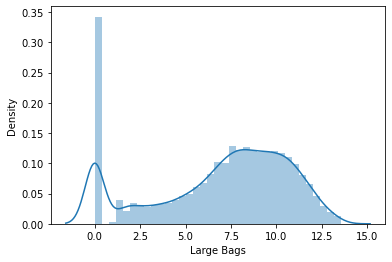

In [85]:
sns.distplot(df_new['Large Bags'])

In [ ]:
# Skewness handling in Total bags column
print("Befre Skewness :",df_new['XLarge Bags'].skew())


<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

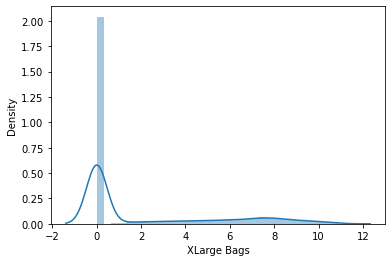

In [89]:
sns.distplot(df_new['XLarge Bags'])

In [87]:

df_new['XLarge Bags']=np.log(df_new['XLarge Bags'])
print("After Skewness removal:",df_new['XLarge Bags'].skew())

After Skewness removal: 1.2162376397206656


<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

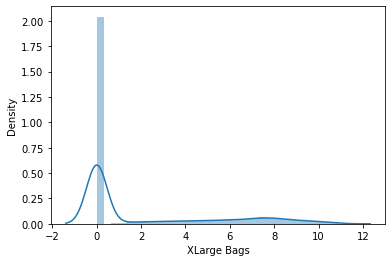

In [90]:
sns.distplot(df_new['XLarge Bags'])

In [91]:
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.050092
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

In [92]:
dfskew=pd.DataFrame({})
dfskew['Columns']=df.columns
dfskew['Before']=list(df.skew())
dfskew['After']=list(df_new.skew())

dfskew

Columns     Before     After
0   AveragePrice   0.580303  0.377432
1   Total Volume   9.007687 -0.050092
2           4046   8.648220 -0.420273
3           4225   8.942466 -0.604619
4           4770  10.159396  0.068532
5     Total Bags   9.756072 -0.384493
6     Small Bags   9.540660 -0.788988
7     Large Bags   9.796455 -0.610874
8    XLarge Bags  13.139751  1.216238
9           type   0.000329 -0.037741
10          year   0.215339  0.229976
11        region   0.000030  0.012798
12         Month   0.106617  0.107408

From  the above dataframe its clear that Skewness got reduced in every column

In [93]:
### Visualising the skewness again 

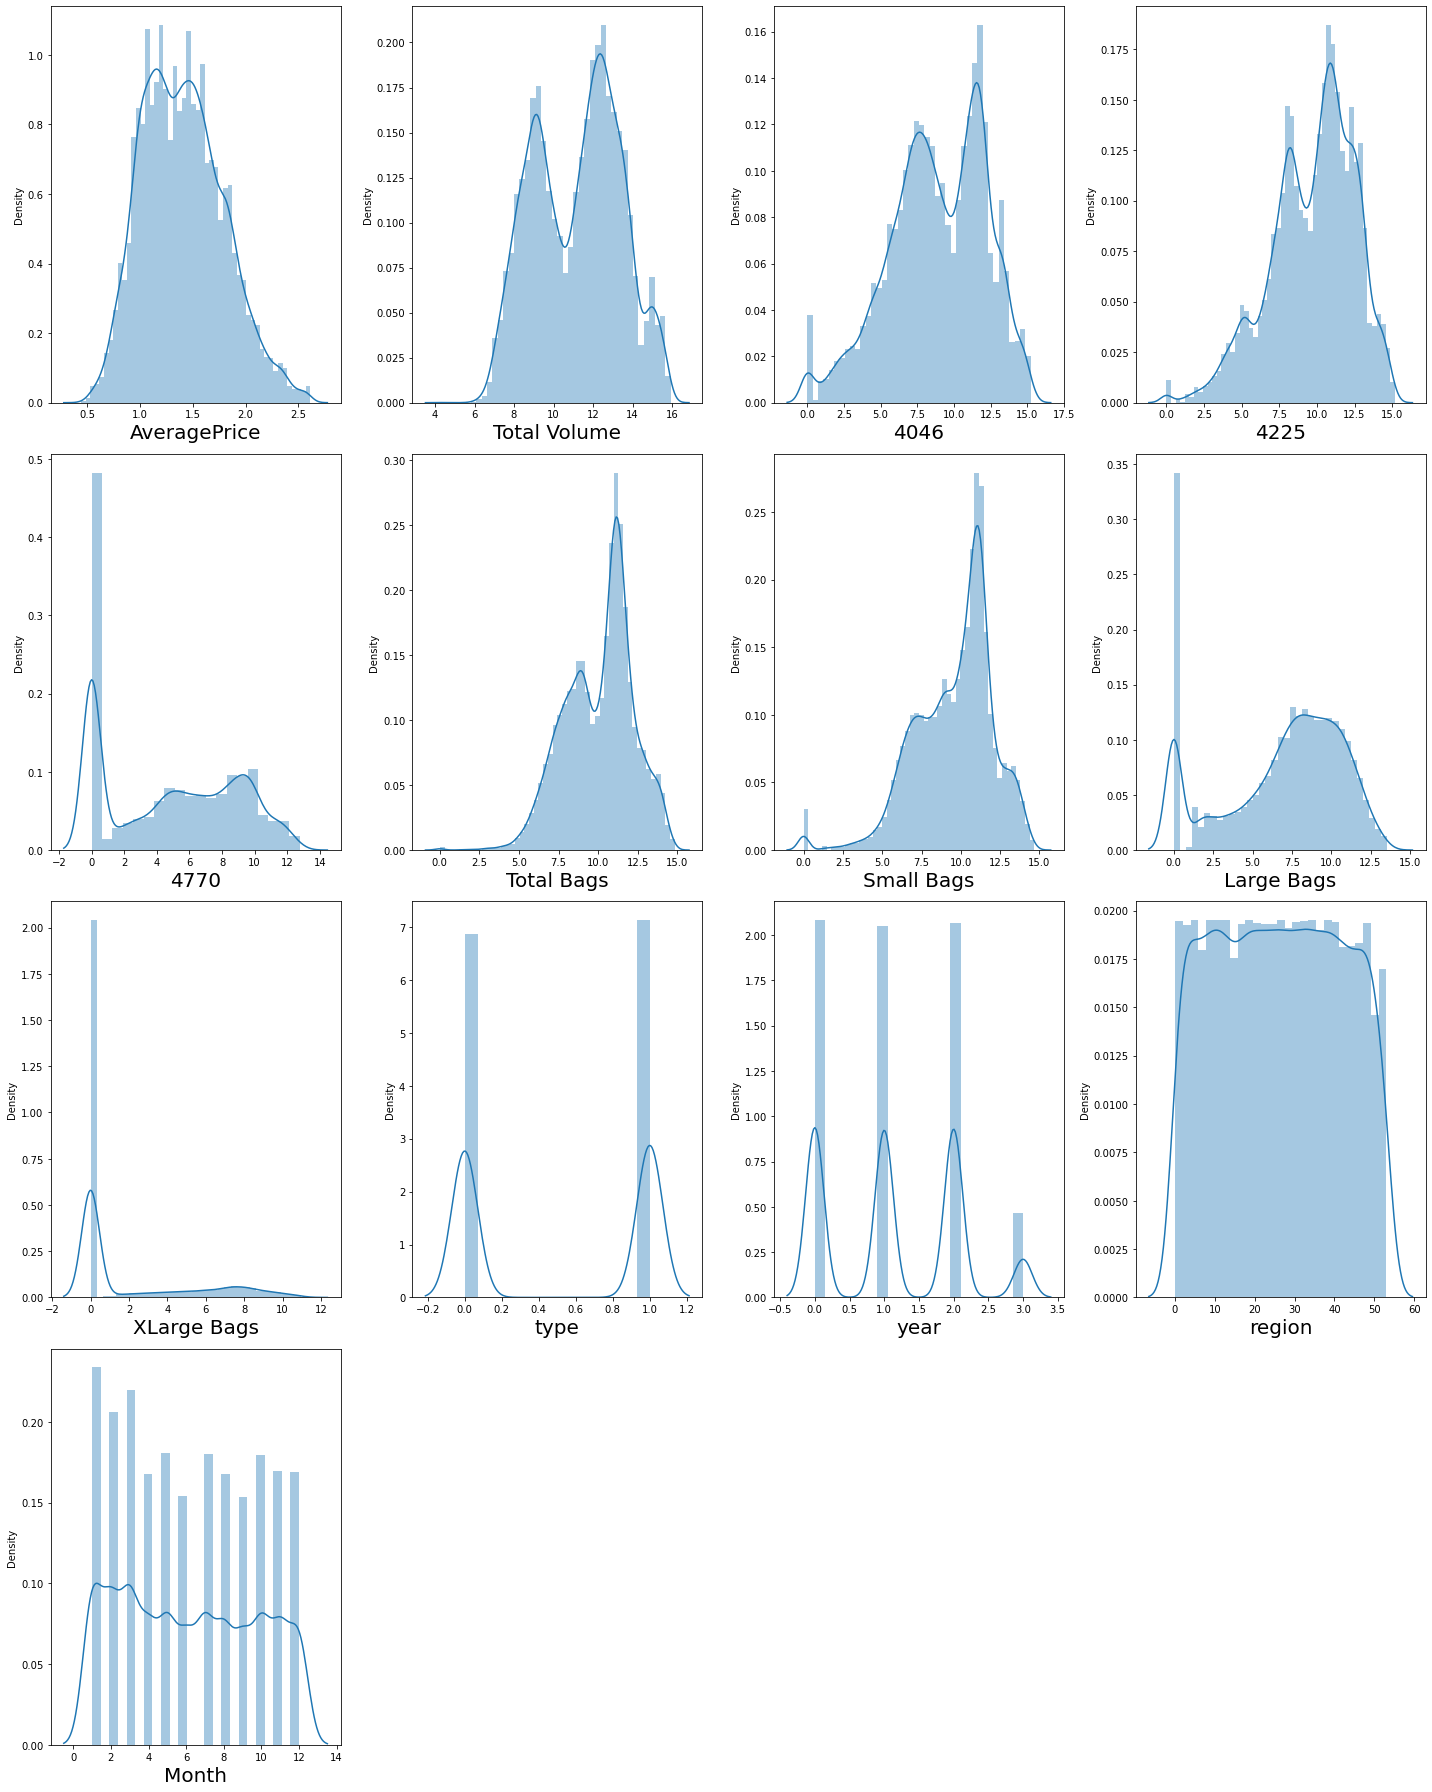

In [94]:
plt.figure(figsize=(20,25))
plot_number=1

for column in df_new:
    if plot_number<=15: 
        ax=plt.subplot(4,4,plot_number)
        sns.distplot(df_new[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()

In [ ]:
# As we already compared the skewness ,,just visulaising the skewness in our data.looks fine.

### Checking the correlation

In [95]:
df_new.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.580300 -0.537346 -0.435384 -0.495013   
Total Volume     -0.580300      1.000000  0.875354  0.900068  0.818039   
4046             -0.537346      0.875354  1.000000  0.739737  0.725446   
4225             -0.435384      0.900068  0.739737  1.000000  0.775653   
4770             -0.495013      0.818039  0.725446  0.775653  1.000000   
Total Bags       -0.566986      0.928706  0.765438  0.771848  0.750909   
Small Bags       -0.474088      0.863333  0.716691  0.696343  0.723369   
Large Bags       -0.470679      0.644861  0.552370  0.586721  0.525201   
XLarge Bags      -0.362711      0.614236  0.539334  0.542787  0.603807   
type              0.613150     -0.800133 -0.713862 -0.730539 -0.778713   
year              0.091704      0.082434  0.002064  0.006839 -0.051743   
region           -0.003242      0.068649  0.159353  0.033212  0.038776   
Month             0.149502     -0.021759 -0.021880 -0.021659 -0.014129   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.566986   -0.474088   -0.470679    -0.362711  0.613150   
Total Volume    0.928706    0.863333    0.644861     0.614236 -0.800133   
4046            0.765438    0.716691    0.552370     0.539334 -0.713862   
4225            0.771848    0.696343    0.586721     0.542787 -0.730539   
4770            0.750909    0.723369    0.525201     0.603807 -0.778713   
Total Bags      1.000000    0.920842    0.685630     0.584338 -0.722171   
Small Bags      0.920842    1.000000    0.486811     0.551761 -0.701637   
Large Bags      0.685630    0.486811    1.000000     0.420044 -0.481150   
XLarge Bags     0.584338    0.551761    0.420044     1.000000 -0.623012   
type           -0.722171   -0.701637   -0.481150    -0.623012  1.000000   
year            0.225807    0.205358    0.192856     0.165585  0.003867   
region          0.064693    0.040210    0.077392    -0.032408  0.018409   
Month          -0.007995   -0.002928   -0.012307     0.014561 -0.009499   

                  year    region     Month  
AveragePrice  0.091704 -0.003242  0.149502  
Total Volume  0.082434  0.068649 -0.021759  
4046          0.002064  0.159353 -0.021880  
4225          0.006839  0.033212 -0.021659  
4770         -0.051743  0.038776 -0.014129  
Total Bags    0.225807  0.064693 -0.007995  
Small Bags    0.205358  0.040210 -0.002928  
Large Bags    0.192856  0.077392 -0.012307  
XLarge Bags   0.165585 -0.032408  0.014561  
type          0.003867  0.018409 -0.009499  
year          1.000000 -0.004417 -0.175287  
region       -0.004417  1.000000  0.000119  
Month        -0.175287  0.000119  1.000000

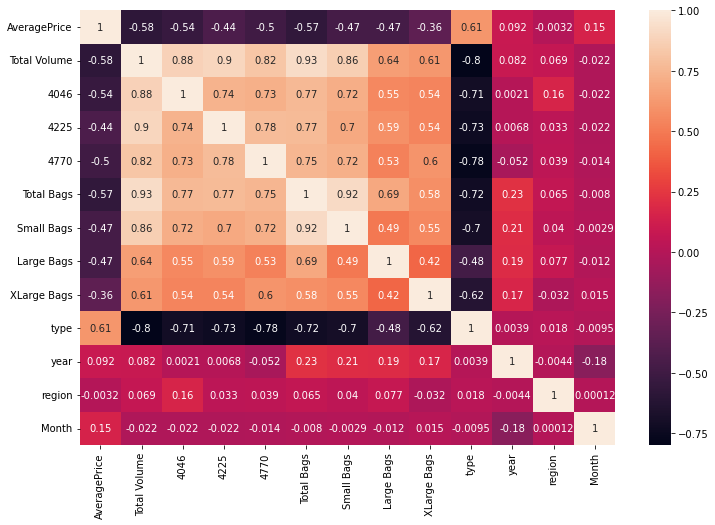

In [96]:
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that W column is positively correlated with E and it is negatively correlated with the H. The W column is least correlated with CG showing a coefficient value of 0.00012 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now I see columns Total Bags and Total Volumes  are positively correlated with a value of 0.93 which is close to 1. Similary, columns Total Volume  and 4046 are positively correlated with a value of 0.88 again being close to 1. The other negatively correlated columns that pop up are type and Total Bags with a value -0..72 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

#### Checking by Scatter plot to confirm Multicolinearity

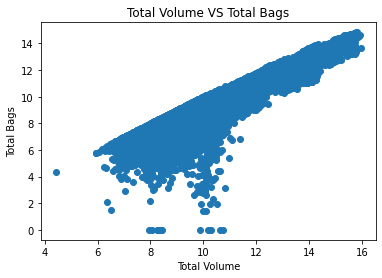

In [97]:
plt.scatter(x='Total Volume',y='Total Bags',data=df_new)
plt.xlabel('Total Volume')
plt.ylabel('Total Bags')
plt.title('Total Volume VS Total Bags')
plt.show()

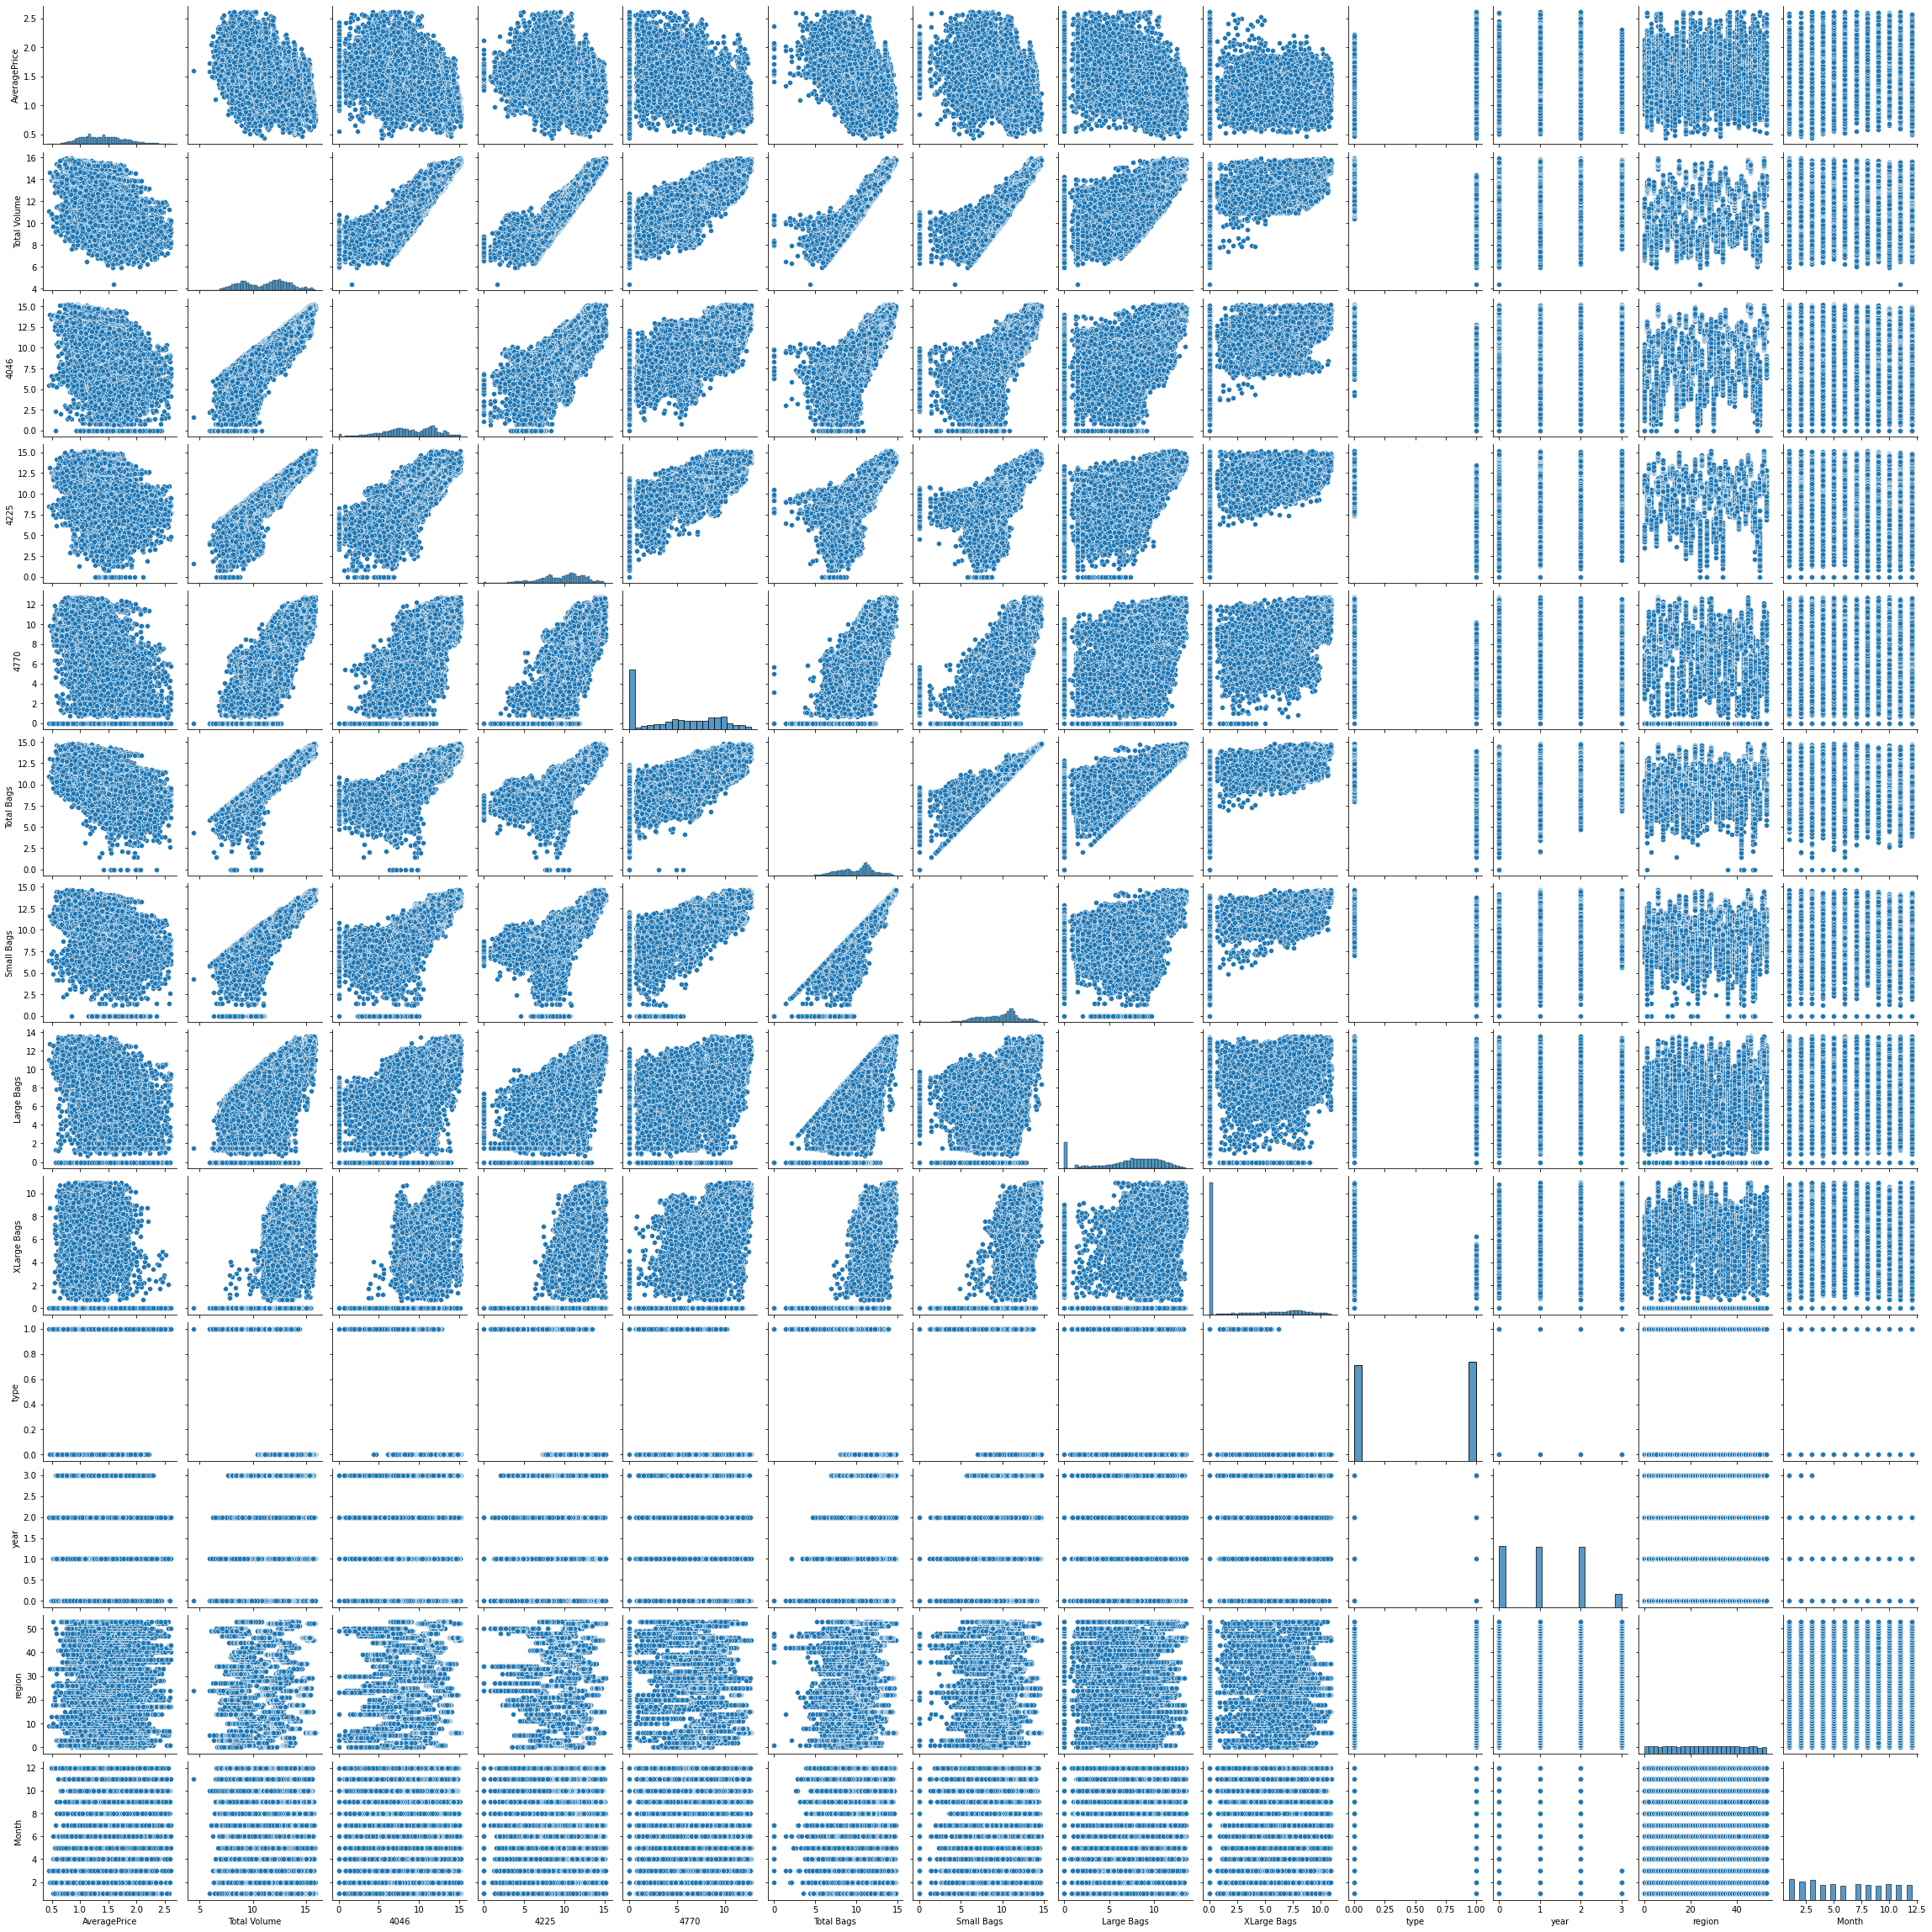

In [98]:
sns.pairplot(df_new)

#### WE can visulise the relationship of the features and label using pairplot

### Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label

In [99]:
#Splitting for checking vif

x=df_new.drop('AveragePrice',axis=1)
y=df_new['AveragePrice']

In [100]:
## BY Checking VIf we can decide which column to delete
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame({})
vif['Column']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [101]:
vif

Column         vif
0   Total Volume  610.154903
1           4046   40.447406
2           4225   94.164983
3           4770    9.726199
4     Total Bags  502.248153
5     Small Bags  147.796473
6     Large Bags   11.510590
7    XLarge Bags    2.622319
8           type    4.827058
9           year    3.443168
10        region    4.145169
11         Month    4.107580

In [102]:
## Toal Bags has the highest VIf ,, so we drop it.

x=x.drop('Total Bags',axis=1)
x
   

Total Volume      4046       4225      4770  Small Bags  Large Bags  \
0         11.070329  6.944801  10.905146  3.895080    9.060055    4.545951   
1         10.912849  6.515127  10.706381  4.083115    9.149429    4.589955   
2         11.680304  6.679222  11.600485  4.879007    8.992584    4.645736   
3         11.277104  7.032624  11.184108  4.298373    8.644425    4.903495   
4         10.840357  6.848515  10.688288  4.340944    8.697389    5.291746   
...             ...       ...        ...       ...         ...         ...   
18244      9.745361  7.624599   7.333154  0.000000    9.477908    6.070391   
18245      9.538783  7.083975   8.141044  0.000000    9.098407    5.786284   
18246      9.530012  7.084159   7.805389  6.591591    9.143431    3.768384   
18247      9.693089  7.332127   8.000363  6.590315    9.298401    3.931826   
18248      9.769361  7.971006   7.765200  5.418453    9.391757    3.296207   

       XLarge Bags  type  year  region  Month  
0              0.0     0     0       0     12  
1              0.0     0     0       0     12  
2              0.0     0     0       0     12  
3              0.0     0     0       0     12  
4              0.0     0     0       0     11  
...            ...   ...   ...     ...    ...  
18244          0.0     1     3      53      2  
18245          0.0     1     3      53      1  
18246          0.0     1     3      53      1  
18247          0.0     1     3      53      1  
18248          0.0     1     3      53      1  

[17651 rows x 11 columns]

In [103]:
#let us drop the Region column
x=x.drop('region',axis=1)
x

Total Volume      4046       4225      4770  Small Bags  Large Bags  \
0         11.070329  6.944801  10.905146  3.895080    9.060055    4.545951   
1         10.912849  6.515127  10.706381  4.083115    9.149429    4.589955   
2         11.680304  6.679222  11.600485  4.879007    8.992584    4.645736   
3         11.277104  7.032624  11.184108  4.298373    8.644425    4.903495   
4         10.840357  6.848515  10.688288  4.340944    8.697389    5.291746   
...             ...       ...        ...       ...         ...         ...   
18244      9.745361  7.624599   7.333154  0.000000    9.477908    6.070391   
18245      9.538783  7.083975   8.141044  0.000000    9.098407    5.786284   
18246      9.530012  7.084159   7.805389  6.591591    9.143431    3.768384   
18247      9.693089  7.332127   8.000363  6.590315    9.298401    3.931826   
18248      9.769361  7.971006   7.765200  5.418453    9.391757    3.296207   

       XLarge Bags  type  year  Month  
0              0.0     0     0     12  
1              0.0     0     0     12  
2              0.0     0     0     12  
3              0.0     0     0     12  
4              0.0     0     0     11  
...            ...   ...   ...    ...  
18244          0.0     1     3      2  
18245          0.0     1     3      1  
18246          0.0     1     3      1  
18247          0.0     1     3      1  
18248          0.0     1     3      1  

[17651 rows x 10 columns]

## Task 1- Regression Model as we are going to predict the average price.

In [103]:
### Our data is ready ..lets scale the data

In [104]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.06192594, -0.58731803,  0.43156498, ..., -1.21001338,
        -1.69549505,  1.64461178],
       [-0.13426234, -0.71946434,  0.35960138, ..., -1.21001338,
        -1.69549505,  1.64461178],
       [ 0.2182594 , -0.66899685,  0.68331601, ..., -1.21001338,
        -1.69549505,  1.64461178],
       ...,
       [-0.76945261, -0.54445811, -0.69071773, ...,  1.98075592,
         1.74705401, -1.46287832],
       [-0.69454533, -0.46819541, -0.62012644, ...,  1.98075592,
         1.74705401, -1.46287832],
       [-0.65951072, -0.27170762, -0.70526836, ...,  1.98075592,
         1.74705401, -1.46287832]])

In [105]:
print('Shape of x:',x.shape)
print('Shape of y:',y.shape)

Shape of x: (17651, 11)
Shape of y: (17651,)


In [106]:
lr=LinearRegression()

### For best Random State

In [107]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if(round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1)):
        print("At random_state",i,"the model performed very well")
        print("At random_state",i)
        print("Trainning Score",r2_score(y_train,pred_train)*100)
        print("Testing Score",r2_score(y_test,pred_test)*100,'\n\n')

At random_state 15 the model performed very well
At random_state 15
Trainning Score 54.072535392208486
Testing Score 54.092860989670946 


At random_state 38 the model performed very well
At random_state 38
Trainning Score 54.066569787498906
Testing Score 54.097597491166184 




#### Selecting the Best Random State 388

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=38)

splitted the data successfully into train and test at random_state 833


In [110]:
print("Shape of x_train",x_train.shape)    
print("Shape of x_test",x_test.shape)    
print("Shape of y_train",y_train.shape)    
print("Shape of y_test",y_test.shape)    

Shape of x_train (14120, 11)
Shape of x_test (3531, 11)
Shape of y_train (14120,)
Shape of y_test (3531,)


### Writing one function for different models accuracy


In [111]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train,y_train)
    if train==True:
        y_pred=clf.predict(x_train)
        print('=================Train Result================')
        print(f"r2 Score of {clf}:{r2_score(y_train,y_pred)*100:.2f}%")
        print(f"score of  {clf}:",clf.score(x_train,y_train))

        
        
    elif train==False:
        
        pred=clf.predict(x_test)
        cv_score = (cross_val_score(clf, x_scaled,y, cv=5).mean())
        r2=r2_score(y_test,pred)
        result = r2 - cv_score
        
        print('\n=================Test Result================\n')
        print(f"\nscore of {clf}:",clf.score(x_test,y_test))
        print(f"r2 score:",r2)
        
        print("\n\nCross Validation Score:", cv_score)

        
        print('\nMean absolute Error: ',mean_absolute_error(y_test,pred))
        print('\nMean Squared Error: ',mean_squared_error(y_test,pred))
        print('\nRoot Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))
        
        print("\n the difference between r2 Score and Cross Validation Score is", result)

### Linear Regression 

In [112]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [113]:
print("R2 Score for Linear Regression Model:\n")
metric_score(lr,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(lr,x_train,x_test,y_train,y_test,train=False) #for testing

R2 Score for Linear Regression Model:

=================Train Result================
r2 Score of LinearRegression():54.07%
score of  LinearRegression(): 0.5406656978749891

=================Test Result================


score of LinearRegression(): 0.5409759749116618
r2 score: 0.5409759749116618


Cross Validation Score: 0.18063232548616565

Mean absolute Error:  0.20565519136647858

Mean Squared Error:  0.06778517086512921

Root Mean Squared Error:  0.26035585429394364

 the difference between r2 Score and Cross Validation Score is 0.3603436494254962


#### OUR RMSE Score is less and difference between r2score and cv score is also less.

#### lets plot the graph and check the trend between y_test and prediction

Text(0.5, 1.0, 'Linear Rgression Model')

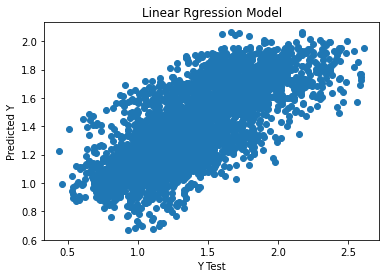

In [114]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Linear Rgression Model')

#### Looks good , we can check with other model and then decide.

#### Let us import and try other models

In [115]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

## Decision Tree

In [116]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)

In [117]:
print("R2 Score for Decision Tree  Model:\n")
metric_score(dt,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(dt,x_train,x_test,y_train,y_test,train=False) #for testing

R2 Score for Decision Tree  Model:

=================Train Result================
r2 Score of DecisionTreeRegressor():100.00%
score of  DecisionTreeRegressor(): 1.0

=================Test Result================


score of DecisionTreeRegressor(): 0.7647185188047008
r2 score: 0.7647185188047008


Cross Validation Score: -0.2425476727697072

Mean absolute Error:  0.12033135089209855

Mean Squared Error:  0.03474457660719343

Root Mean Squared Error:  0.18639897158298227

 the difference between r2 Score and Cross Validation Score is 1.0072661915744079


#### Training score is 1 which is indicating an overfiting of data
#### Our RMSE (Decision Tree) is lower than the previous one we got with Linear Regression. Lets Plot the scatterplot

Text(0.5, 1.0, 'Decision Tree Model')

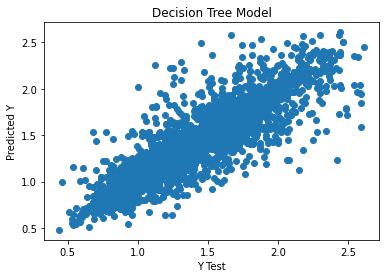

In [118]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Decision Tree Model')

Nice, here we can see that we nearly have a straight line, in other words its better than the Linear regression model.

## RandomForestRegressor

In [119]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

In [120]:
print("R2 Score for Random Forest Model:\n")
metric_score(rf,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(rf,x_train,x_test,y_train,y_test,train=False) #for testing

R2 Score for Random Forest Model:

=================Train Result================
r2 Score of RandomForestRegressor():98.45%
score of  RandomForestRegressor(): 0.9844555353194339

=================Test Result================


score of RandomForestRegressor(): 0.8891984996656733
r2 score: 0.8891984996656733


Cross Validation Score: 0.2161237921408885

Mean absolute Error:  0.08986120079297648

Mean Squared Error:  0.016362321407533274

Root Mean Squared Error:  0.12791528996774887

 the difference between r2 Score and Cross Validation Score is 0.6730747075247848


#### The RMSE is lowest compare to Linear and Decision  so we can say that we do have a good model, but lets check to be more sure.


Text(0.5, 1.0, 'Random Forest Regressor Model')

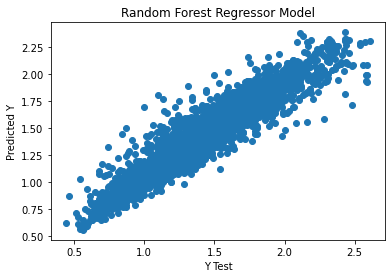

In [121]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Random Forest Regressor Model')

#### Plot is also looking fine ..we can consider this model to being our final model but lets check with other model as well.


## KNN

In [122]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
red=knn.predict(x_test)

In [123]:
print("R2 Score for KNN Model:\n")
metric_score(knn,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(knn,x_train,x_test,y_train,y_test,train=False) #for testingprint

R2 Score for KNN Model:

=================Train Result================
r2 Score of KNeighborsRegressor():91.48%
score of  KNeighborsRegressor(): 0.9148436604324844

=================Test Result================


score of KNeighborsRegressor(): 0.8660581589853013
r2 score: 0.8660581589853013


Cross Validation Score: 0.025931201392059133

Mean absolute Error:  0.09929141886151233

Mean Squared Error:  0.0197795106202209

Root Mean Squared Error:  0.1406396481089913

 the difference between r2 Score and Cross Validation Score is 0.8401269575932421


__Although RMSE looks fine but difference between r2 and CV score is highest so we are not consideringthis model. Lets plota nd visulaise the prediction vs actual__

Text(0.5, 1.0, 'KNN Model')

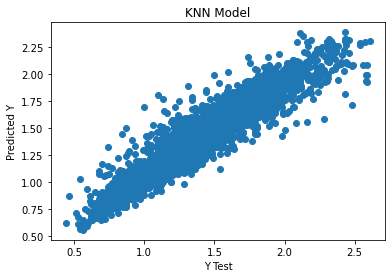

In [124]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('KNN Model')

## SVR

In [125]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)

In [126]:
print("R2 Score for SVR  Model:\n")
metric_score(svr,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(svr,x_train,x_test,y_train,y_test,train=False) #for testing

R2 Score for SVR  Model:

=================Train Result================
r2 Score of SVR():81.20%
score of  SVR(): 0.8119567898576672

=================Test Result================


score of SVR(): 0.7996386032989642
r2 score: 0.7996386032989642


Cross Validation Score: 0.019219771370570717

Mean absolute Error:  0.12848548494529416

Mean Squared Error:  0.02958784457423969

Root Mean Squared Error:  0.1720111757248339

 the difference between r2 Score and Cross Validation Score is 0.7804188319283935


__RMSE is good but difference between r2 Score and Cross Validation Score is 0.78 which is highest so we are not considering this model as well__

Text(0.5, 1.0, 'SVR Model')

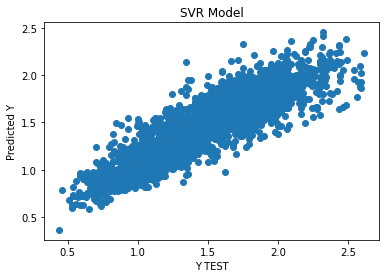

In [127]:
plt.scatter(x=y_test,y=pred)
plt.xlabel("Y TEST")
plt.ylabel("Predicted Y")
plt.title("SVR Model")


In [128]:
from sklearn.ensemble import GradientBoostingRegressor


In [129]:
gdbr=GradientBoostingRegressor()
gdbr.fit(x_train,y_train)
pred=gdbr.predict(x_test)


In [140]:
print("R2 Score for GDBR  Model:\n")
metric_score(gdbr,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(gdbr,x_train,x_test,y_train,y_test,train=False) #for testing

R2 Score for GDBR  Model:

=================Train Result================
r2 Score of GradientBoostingRegressor():72.73%
score of  GradientBoostingRegressor(): 0.7272710986002899

=================Test Result================


score of GradientBoostingRegressor(): 0.7296210641930807
r2 score: 0.7296210641930807


Cross Validation Score: 0.3485486820023846

Mean absolute Error:  0.1563305031266379

Mean Squared Error:  0.04149005544976119

Root Mean Squared Error:  0.20369107847365625

 the difference between r2 Score and Cross Validation Score is 0.3810723821906961


__Considering r2 score and difference between r2 Score and CV score ..we are getting good values.<br>
Also RMSE is low so we can consider this as our final model__

Text(0.5, 1.0, 'Gradient Boost Regressor Model')

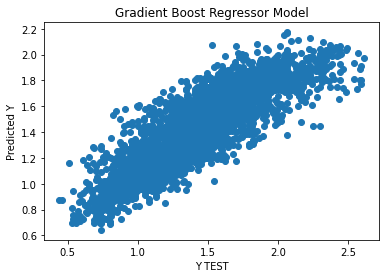

In [130]:
plt.scatter(x=y_test,y=pred)
plt.xlabel("Y TEST")
plt.ylabel("Predicted Y")
plt.title("Gradient Boost Regressor Model")

In [131]:
from sklearn.ensemble import AdaBoostRegressor


## AdaBoostRegressor


In [148]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)


In [150]:
print("R2 Score for AdaBoost  Model:\n")
metric_score(ada,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(ada,x_train,x_test,y_train,y_test,train=False) #for testing

R2 Score for AdaBoost  Model:

=================Train Result================
r2 Score of AdaBoostRegressor():54.29%
score of  AdaBoostRegressor(): 0.5428837817785821

=================Test Result================


score of AdaBoostRegressor(): 0.5676507817468089
r2 score: 0.5676507817468089


Cross Validation Score: 0.03801299420509443

Mean absolute Error:  0.2082413031612006

Mean Squared Error:  0.06634463955356223

Root Mean Squared Error:  0.25757453203599584

 the difference between r2 Score and Cross Validation Score is 0.5296377875417145


Text(0.5, 1.0, 'AdaBoost Regressor Model')

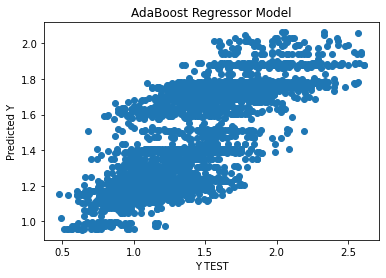

In [152]:
plt.scatter(x=y_test,y=pred)
plt.xlabel("Y TEST")
plt.ylabel("Predicted Y")
plt.title("AdaBoost Regressor Model")

### As we  worked on every model calculated r2score and difference between r2 and cv_score we found the Gradientboost is giving least difference between r2 and CV_score(.38) so we are choosing GradientBoost Regressor as our final model.

In [132]:
gdbr=GradientBoostingRegressor()

In [133]:
gdbr.fit(x_train,y_train)
pred_m=gdbr.predict(x_test)
score=gdbr.score(x_train,y_train)
score2=gdbr.score(x_test,y_test)
pred=gdbr.predict(x_test)
r2=r2_score(y_test,pred)
diff=r2-cross_val_score(gdbr,x_scaled,y,cv=5).mean()
mse=mean_squared_error(y_test,pred)
print('percent of training data learnt by model:',score)
print('percent of test data learnt by model:',score2)
print('mean squared error of model:',mse)
print('r2 score:',r2)
print("difference between r2 score and cv score",diff)

percent of training data learnt by model: 0.752778702265347
percent of test data learnt by model: 0.7370251008885973
mean squared error of model: 0.03883412957758804
r2 score: 0.7370251008885973
difference between r2 score and cv score 0.3558581252610875


In [ ]:
### Hyper Parameter Tuning

In [136]:
from sklearn.model_selection import GridSearchCV


In [137]:
parameter={'loss':['squared_error', 'absolute_error', 'huber', 'quantile']
           ,'learning_rate':np.arange(0.01,1.0,.001),
         'criterion':['friedman_mse','squared_error'],
          'alpha':np.random.uniform(low=0, high=100, size=(50,))}

In [ ]:
grid=GridSearchCV(gdbr,param_grid=parameter)
grid.fit(x_train,y_train)
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

In [135]:
from tqdm.notebook import tqdm_notebook
import time

Unable to perform , my system configuration is not suitable... Kept running for more than 4 hrs and system is getting crashed. so stopped the gridsearch process.

__Checking for overfitting__


In [141]:
conclusion=pd.DataFrame({})
conclusion['Actual']=y_test
conclusion['Predicted']=pred
conclusion

Actual  Predicted
6864     1.04   1.244900
9172     1.59   1.762698
860      1.13   1.145216
2955     1.12   1.108641
1360     0.94   1.052550
...       ...        ...
12933    1.90   1.725394
15770    1.49   1.633628
11730    1.73   1.681008
446      1.26   1.187495
15231    2.01   1.802813

[3531 rows x 2 columns]

<AxesSubplot:xlabel='Actual', ylabel='Density'>

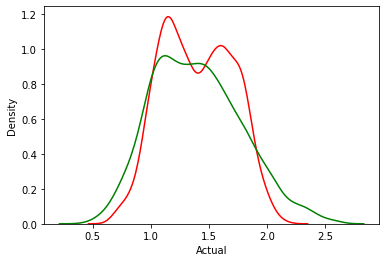

In [142]:
#viewing the graph about performance of the model using distribution plot
ax1=sns.distplot(conclusion['Predicted'],hist=False,color='r',label='Predicted')
sns.distplot(conclusion['Actual'],hist=False,color='g',label='Actual',ax=ax1)

In [143]:
#The model is little overfit, let's find the best alpha using regularization
from sklearn.linear_model import Ridge,RidgeCV
alp=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alp,cv=5,normalize=True)
ridgecv.fit(x_train,y_train)
#Getting the best alpha value
ridgecv.alpha_
     

0.11438328499765782

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

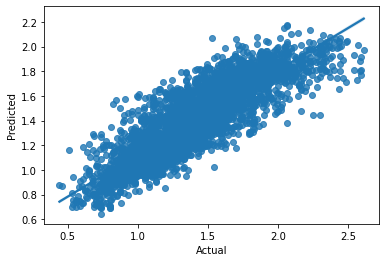

In [144]:
sns.regplot(x='Actual',y='Predicted',data=conclusion)


In [146]:
#Let us try to improve the model accuracy by tuning using grid search cv
pbar=tqdm_notebook(100)
par={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'max_features':['auto','sqr2','log2'],
     'random_state':[2508],'alpha':[0.114],'max_leaf_nodes':range(0,20,5),'max_depth':[2,5,10,20]}
grid=GridSearchCV(gdbr,param_grid=par,cv=5,verbose=True)
grid.fit(x_train,y_train)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)

0it [00:00, ?it/s]

Fitting 5 folds for each of 192 candidates, totalling 960 fits
score:  0.8189346952050578
best estimators: GradientBoostingRegressor(alpha=0.114, max_depth=20, max_features='auto',
                          max_leaf_nodes=15, random_state=2508)
best parameters: {'alpha': 0.114, 'loss': 'squared_error', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': 15, 'random_state': 2508}


In [147]:
#Let us input the parameters of random state & alpha values
gdbr=GradientBoostingRegressor(random_state=2508,alpha=0.114,loss='squared_error',max_features='auto',
                              max_leaf_nodes= 15,max_depth=20)
gdbr.fit(x_train,y_train)
score=gdbr.score(x_train,y_train)
score2=gdbr.score(x_test,y_test)
predt=gdbr.predict(x_test)
r2=r2_score(y_test,predt)
mse=mean_squared_error(y_test,predt)
print('percent of training data learnt by model:',score)
print('percent of test data learnt by model:',score2)
print('mean squared error of model:',mse)
print('r2 score:',r2)

percent of training data learnt by model: 0.845364179059401
percent of test data learnt by model: 0.8190994957433594
mean squared error of model: 0.026714008244480343
r2 score: 0.8190994957433594


__r2 score increased from 0.73 to 0.81__

In [149]:

#New df for tuned model to check 
tuned=pd.DataFrame({})
tuned['Actual']=y_test
tuned['Earlier Prediction']=conclusion['Predicted']
tuned['Predicted']=predt
tuned
     


Actual  Earlier Prediction  Predicted
6864     1.04            1.244900   1.202097
9172     1.59            1.762698   1.761825
860      1.13            1.145216   1.155504
2955     1.12            1.108641   1.127035
1360     0.94            1.052550   0.995741
...       ...                 ...        ...
12933    1.90            1.725394   1.752646
15770    1.49            1.633628   1.626267
11730    1.73            1.681008   1.694538
446      1.26            1.187495   1.196257
15231    2.01            1.802813   1.911086

[3531 rows x 3 columns]

<AxesSubplot:xlabel='Earlier Prediction', ylabel='Density'>

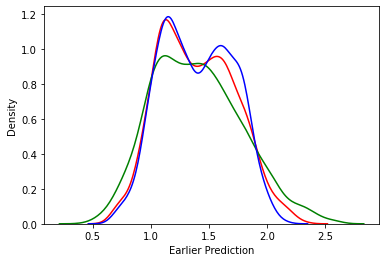

In [150]:
#viewing the graph about performance of the model using distribution plot

ax1=sns.distplot(tuned['Predicted'],hist=False,color='r',label='Predicted')
sns.distplot(tuned['Actual'],hist=False,color='g',label='Actual',ax=ax1)
sns.distplot(tuned['Earlier Prediction'],hist=False,color='b',label='Earlier Prediction',ax=ax1)

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

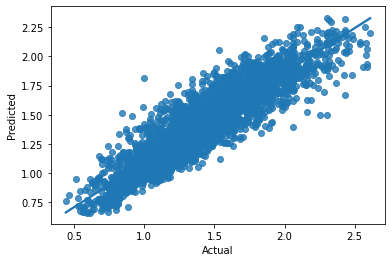

In [151]:
sns.regplot(x='Actual',y='Predicted',data=tuned)


In [156]:

#Let us save the tuned model 
import pickle

filename='avacado price.pkl'


In [157]:
pickle.dump(gdbr,open(filename,'wb'))

## Task 2-Predicting the Region (Classification)

In [158]:
#Splitting for checking vif
xc=df_new.drop('region',axis=1)
yc=df_new['region']

In [162]:
#
vif_c=pd.DataFrame()
vif_c['Variable']=xc.columns
vif_c['vif factor']=[variance_inflation_factor(xc.values,i) for i in range(xc.shape[1])]
vif_c

Variable  vif factor
0   AveragePrice   24.325519
1   Total Volume  653.407496
2           4046   40.490748
3           4225   94.907951
4           4770    9.730782
5     Total Bags  520.074797
6     Small Bags  148.514788
7     Large Bags   11.950445
8    XLarge Bags    2.607881
9           type    7.476297
10          year    3.712843
11         Month    4.594201

We can see high vif in Total Volume,Total Bags,Small bags , let us drop the column Total Bags.



In [164]:
region_df=df_new.pivot_table(index='region',columns='year',values=['AveragePrice'])
region_df


AveragePrice                              
year              0         1         2         3
region                                           
0          1.538750  1.533942  1.637830  1.435833
1          1.380577  1.214135  1.416190  1.288750
2          1.368846  1.587596  1.679434  1.378333
3          1.373750  1.141923  1.381753  1.492500
4          1.473558  1.426154  1.679528  1.576667
5          1.544615  1.483846  1.587736  1.226250
6          1.324706  1.354388  1.658077  1.743333
7          1.575769  1.497885  1.708900  1.482500
8          1.404038  1.547308  1.714811  1.561667
9          1.202308  1.088365  1.319434  1.275833
10         1.273846  1.186346  1.315660  1.171667
11         1.077885  0.996154  1.176981  1.102917
12         1.187788  1.093173  1.357736  1.280833
13         1.338269  1.172404  1.339057  1.177917
14         1.416346  1.509327  1.607596  1.328333
15         1.406667  1.339878  1.444362  1.374000
16         1.471635  1.511635  1.595755  1.336667
17         1.747788  1.834902  1.850594  1.677500
18         1.048077  0.991923  1.104057  1.042083
19         1.342981  1.301538  1.330755  1.168333
20         1.503077  1.367692  1.658952  1.456667
21         1.368846  1.291000  1.406190  1.393750
22         1.152500  1.083750  1.399901  1.381364
23         1.294423  1.211538  1.357075  1.267917
24         1.383558  1.279808  1.602913  1.344167
25         1.357647  1.355347  1.520566  1.358333
26         1.277212  1.116154  1.240000  1.222500
27         1.267692  1.248654  1.419057  1.204167
28         1.644519  1.753398  1.809906  1.574583
29         1.557030  1.614343  1.704757  1.495909
30         1.473365  1.392692  1.577170  1.421250
31         1.499327  1.370769  1.648058  1.354583
32         1.555192  1.674808  1.707264  1.448750
33         1.157115  1.232059  1.272547  1.155000
34         1.407212  1.343365  1.362925  1.275417
35         1.437885  1.377500  1.510472  1.359583
36         1.306827  1.191635  1.320918  1.396250
37         1.449423  1.447788  1.656667  1.535000
38         1.274519  1.211154  1.399245  1.235000
39         1.227115  1.147500  1.358302  1.285833
40         1.454038  1.647255  1.774057  1.472083
41         1.274231  1.285882  1.584528  1.477917
42         1.475109  1.774894  1.830769  1.549583
43         1.422212  1.286408  1.458947  1.455000
44         1.454712  1.305000  1.479811  1.268333
45         1.132245  1.103924  1.191633  1.244706
46         1.414712  1.355057  1.546989  1.318261
47         1.400385  1.318447  1.489897  1.425000
48         1.503365  1.185481  1.535050  1.465833
49         1.529038  1.503462  1.589434  1.250417
50         1.356635  1.264519  1.594038  1.330833
51         1.502308  1.480385  1.651509  1.554167
52         1.237788  1.297763  1.636875  1.613333
53         1.259320  1.199010  1.281538  1.251250

We can see the prices in each region in each year



In [165]:
df_reg=df_new.groupby('region')['AveragePrice'].mean()
df_reg
     

region
0     1.561036
1     1.333769
2     1.534231
3     1.311489
4     1.530888
5     1.516834
6     1.441724
7     1.584729
8     1.556775
9     1.209201
10    1.252781
11    1.085592
12    1.218580
13    1.276095
14    1.498036
15    1.397757
16    1.513284
17    1.800906
18    1.047929
19    1.313994
20    1.506558
21    1.359039
22    1.221601
23    1.286686
24    1.415970
25    1.408859
26    1.212101
27    1.304793
28    1.724837
29    1.617169
30    1.477396
31    1.494776
32    1.632130
33    1.216131
34    1.364320
35    1.436509
36    1.281212
37    1.515823
38    1.291331
39    1.247929
40    1.614940
41    1.390208
42    1.682193
43    1.392423
44    1.403284
45    1.151062
46    1.430651
47    1.402927
48    1.410991
49    1.520325
50    1.399762
51    1.546036
52    1.372969
53    1.247349
Name: AveragePrice, dtype: float64

In [166]:
print(df_reg.max())
print(df_reg.min())
print(df_reg.mean())
     

1.8009063444108762
1.0479289940828402
1.4067763120197996


In this we can see the max avgprice of all regions is 1.8, mean - 1.4 and least is 1.0



In [168]:
xc=xc.drop('Total Bags',axis=1)
xc

AveragePrice  Total Volume      4046       4225      4770  Small Bags  \
0              1.33     11.070329  6.944801  10.905146  3.895080    9.060055   
1              1.35     10.912849  6.515127  10.706381  4.083115    9.149429   
2              0.93     11.680304  6.679222  11.600485  4.879007    8.992584   
3              1.08     11.277104  7.032624  11.184108  4.298373    8.644425   
4              1.28     10.840357  6.848515  10.688288  4.340944    8.697389   
...             ...           ...       ...        ...       ...         ...   
18244          1.63      9.745361  7.624599   7.333154  0.000000    9.477908   
18245          1.71      9.538783  7.083975   8.141044  0.000000    9.098407   
18246          1.87      9.530012  7.084159   7.805389  6.591591    9.143431   
18247          1.93      9.693089  7.332127   8.000363  6.590315    9.298401   
18248          1.62      9.769361  7.971006   7.765200  5.418453    9.391757   

       Large Bags  XLarge Bags  type  year  Month  
0        4.545951          0.0     0     0     12  
1        4.589955          0.0     0     0     12  
2        4.645736          0.0     0     0     12  
3        4.903495          0.0     0     0     12  
4        5.291746          0.0     0     0     11  
...           ...          ...   ...   ...    ...  
18244    6.070391          0.0     1     3      2  
18245    5.786284          0.0     1     3      1  
18246    3.768384          0.0     1     3      1  
18247    3.931826          0.0     1     3      1  
18248    3.296207          0.0     1     3      1  

[17651 rows x 11 columns]

In [170]:
print('Shape of xr:',xc.shape)
print('Shape of yr:',yc.shape)
     

Shape of xr: (17651, 11)
Shape of yr: (17651,)


### Feature Scaling

In [172]:
scaler=StandardScaler()
xc_scaled=scaler.fit_transform(xc)
xc_scaled
     

array([[-0.19535234, -0.06192594, -0.58731803, ..., -1.01904715,
        -1.21001338,  1.64461178],
       [-0.1435096 , -0.13426234, -0.71946434, ..., -1.01904715,
        -1.21001338,  1.64461178],
       [-1.2322071 ,  0.2182594 , -0.66899685, ..., -1.01904715,
        -1.21001338,  1.64461178],
       ...,
       [ 1.20440158, -0.76945261, -0.54445811, ...,  0.98130886,
         1.98075592, -1.46287832],
       [ 1.35992979, -0.69454533, -0.46819541, ...,  0.98130886,
         1.98075592, -1.46287832],
       [ 0.55636736, -0.65951072, -0.27170762, ...,  0.98130886,
         1.98075592, -1.46287832]])

Now our data is ready to send for training. Now this is Classification model



In [179]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

## For best Random State

In [177]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(xc_scaled,yc,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print('Best score:',maxAcc)
print('Random State:',rs)

Best score: 0.5406400453129425
Random State: 11


In [178]:
#Let us split the data now at that random state
x_train,x_test,y_train,y_test=train_test_split(xc_scaled,yc,test_size=0.2,random_state=11)


In [180]:
def classify(clf, xc_scaled, yc):
    x_train, x_test, y_train, y_test = train_test_split(xc_scaled, yc, test_size=0.20, random_state=826)
    
    # Training the model
    clf.fit(x_train,y_train)
    
    # Predicting Y_test
    pred = clf.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(clf, xc_scaled, yc, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

## Logistic Regression


In [181]:
clf=LogisticRegression()
classify(clf, xc_scaled, yc)

Accuracy Score: 52.13820447465307

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.68        66
           1       0.26      0.42      0.32        60
           2       0.44      0.50      0.47        74
           3       0.65      0.41      0.50        63
           4       0.52      0.48      0.50        69
           5       0.78      0.48      0.59        88
           6       0.88      0.85      0.86        79
           7       0.63      0.72      0.67        67
           8       0.72      0.73      0.72        81
           9       0.59      0.76      0.66        79
          10       0.47      0.55      0.51        77
          11       0.72      0.59      0.65        74
          12       0.56      0.44      0.49        80
          13       0.48      0.42      0.44        72
          14       0.70      0.60      0.65        67
          15       0.69      0.49      0.57        55
          16       0.4

## Decision Tree

In [182]:
clf=DecisionTreeClassifier()
classify(clf, xc_scaled, yc)

Accuracy Score: 79.92070235060889

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        66
           1       0.72      0.73      0.73        60
           2       0.87      0.91      0.89        74
           3       0.85      0.87      0.86        63
           4       0.92      0.83      0.87        69
           5       0.89      0.72      0.79        88
           6       0.99      0.95      0.97        79
           7       0.79      0.78      0.78        67
           8       0.95      0.88      0.91        81
           9       0.82      0.82      0.82        79
          10       0.74      0.71      0.73        77
          11       0.88      0.82      0.85        74
          12       0.92      0.82      0.87        80
          13       0.75      0.72      0.74        72
          14       0.80      0.78      0.79        67
          15       0.85      0.95      0.90        55
          16       0.8

## RandomForest

In [183]:
clf=RandomForestClassifier()
classify(clf, xc_scaled, yc)

Accuracy Score: 92.12687623902576

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88        66
           1       0.77      0.90      0.83        60
           2       0.97      1.00      0.99        74
           3       0.95      0.94      0.94        63
           4       0.94      0.99      0.96        69
           5       0.95      0.83      0.88        88
           6       0.99      0.99      0.99        79
           7       0.94      0.91      0.92        67
           8       1.00      0.99      0.99        81
           9       0.95      0.87      0.91        79
          10       0.89      0.91      0.90        77
          11       0.95      0.95      0.95        74
          12       0.96      0.97      0.97        80
          13       0.88      0.90      0.89        72
          14       0.95      0.94      0.95        67
          15       0.95      0.98      0.96        55
          16       0.9

## SVC

In [184]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [185]:
clf=SVC()
classify(clf, xc_scaled, yc)

Accuracy Score: 82.27131124327386

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.95      0.80        66
           1       0.51      0.60      0.55        60
           2       0.89      1.00      0.94        74
           3       0.92      0.87      0.89        63
           4       0.91      0.91      0.91        69
           5       0.94      0.68      0.79        88
           6       1.00      0.97      0.99        79
           7       0.83      0.64      0.72        67
           8       0.99      0.99      0.99        81
           9       0.85      0.80      0.82        79
          10       0.67      0.64      0.65        77
          11       0.89      0.85      0.87        74
          12       0.94      0.94      0.94        80
          13       0.71      0.79      0.75        72
          14       0.90      0.91      0.90        67
          15       0.96      0.98      0.97        55
          16       0.9

## KNN

In [186]:
clf=KNeighborsClassifier()
classify(clf, xc_scaled, yc)

Accuracy Score: 82.12970829793261

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.82        66
           1       0.67      0.75      0.71        60
           2       0.77      0.97      0.86        74
           3       0.88      0.81      0.84        63
           4       0.93      0.96      0.94        69
           5       0.88      0.74      0.80        88
           6       0.96      0.94      0.95        79
           7       0.73      0.84      0.78        67
           8       0.97      0.90      0.94        81
           9       0.77      0.77      0.77        79
          10       0.60      0.69      0.64        77
          11       0.82      0.93      0.87        74
          12       0.96      0.89      0.92        80
          13       0.71      0.79      0.75        72
          14       0.88      0.91      0.90        67
          15       0.96      0.93      0.94        55
          16       0.8

## XGB

In [187]:
import xgboost as xgb

In [188]:
clf=xgb.XGBClassifier()

clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [189]:
classify(clf, xc_scaled, yc)

Accuracy Score: 89.238176154064

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        66
           1       0.82      0.82      0.82        60
           2       0.99      1.00      0.99        74
           3       0.95      0.90      0.93        63
           4       0.97      0.97      0.97        69
           5       0.92      0.81      0.86        88
           6       0.97      0.96      0.97        79
           7       0.94      0.87      0.90        67
           8       0.96      1.00      0.98        81
           9       0.92      0.86      0.89        79
          10       0.84      0.83      0.84        77
          11       0.91      0.91      0.91        74
          12       0.95      0.90      0.92        80
          13       0.85      0.88      0.86        72
          14       1.00      0.91      0.95        67
          15       0.96      1.00      0.98        55
          16       0.95 

__We can see the least difference b/w cv score and f1 score is for LogisticRegressor, but its accuracy is very less.so letus consider the next model i.e RandomForest as the best model and tune it.<br>

__Present accuracy of the RandomForest classifier model is 92%__

In [196]:
###Tuning the model
param_grid = {
    'n_estimators': [100,200,500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': range(0,50,5),
    'max_leaf_nodes': range(0,50,5)
}
rfc=RandomForestClassifier()

In [197]:
grid=GridSearchCV(rfc,param_grid=param_grid)


In [198]:
grid.fit(x_train,y_train)

print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)
grid.best_score_



KeyboardInterrupt



Rerun the block by mistake..took so long so had to intrrupt in betweeen.

In [206]:
rcf=RandomForestClassifier(max_depth=35,max_features='log2',max_leaf_nodes= 25,n_estimators=500)
rcf.fit(x_train,y_train)
predr=rcf.predict(x_test)
print('Metrics of RandomForestClassifier:')
print('Score:',accuracy_score(y_test,predr))
print('Confusion Matrix:',confusion_matrix(y_test,predr))
print('Classification Report:',classification_report(y_test,predr))


Accuracy Score: 91.75870858113849

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88        66
           1       0.81      0.90      0.85        60
           2       0.97      1.00      0.99        74
           3       0.98      0.94      0.96        63
           4       0.96      0.99      0.97        69
           5       0.96      0.80      0.87        88
           6       0.99      0.99      0.99        79
           7       0.94      0.88      0.91        67
           8       1.00      0.99      0.99        81
           9       0.94      0.86      0.90        79
          10       0.91      0.88      0.89        77
          11       0.93      0.93      0.93        74
          12       0.99      0.96      0.97        80
          13       0.87      0.90      0.88        72
          14       0.98      0.96      0.97        67
          15       0.93      0.98      0.96        55
          16       0.9

__After Hypertuning we can see that accuracy is not increasing even it got reduced
hence we can consider our base model is the best model we got__

In [207]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Metrics of RandomForestClassifier:')
print('Score:',accuracy_score(y_test,predrf))
print('Confusion Matrix:',confusion_matrix(y_test,predrf))
print('Classification Report:',classification_report(y_test,predrf))


Metrics of RandomForestClassifier:
Score: 0.9102237326536392
Confusion Matrix: [[62  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 81 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  1  0 ...  0  0 71]]
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.95      0.95        65
           1       0.77      0.91      0.83        53
           2       1.00      0.98      0.99        83
           3       0.89      0.88      0.89        66
           4       0.99      1.00      0.99        78
           5       0.86      0.86      0.86        59
           6       0.98      1.00      0.99        50
           7       0.92      0.86      0.89        66
           8       0.96      1.00      0.98        71
           9       0.94      0.94      0.94        72
          10       0.83      0.84      0.84        58
          11       0.94      0.90      0.92        72
          12       0.91      0.97      

## Confusion Matrix

In [210]:
from sklearn import metrics


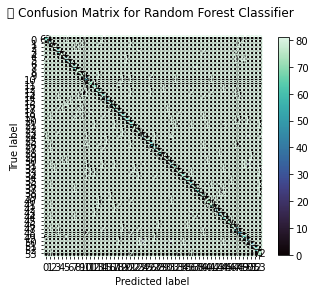

In [212]:
class_names = df.columns
metrics.plot_confusion_matrix(rf.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Random Forest Classifier \n')
plt.show()

### AUC ROC curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


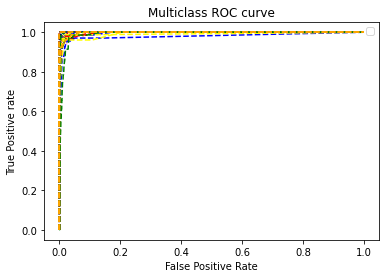

In [214]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

#predicting the probability
pred_prob=rf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 54

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
import random
color=['orange','blue','green','red','pink','yellow','black']
# plotting 
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--',color=random.choice(color))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

### Saving the model


In [208]:
import pickle

In [209]:
filename='avacado_region.pkl'

In [ ]:
pickle.dump(svcfinal,open(filename,'wb'))


In [215]:
## Conclusion
region=pd.DataFrame({})
region['Actual']=y_test
region['Predicted']=predrf
region

Actual  Predicted
2891        1          1
15202       8          8
12977      20         20
14058      40         40
13294      26         26
...       ...        ...
3827       19         19
3959       22         22
8466       53         53
2379       45         45
5153       45         45

[3531 rows x 2 columns]

Actual  Predicted
2891        1         50
15202       8          8
12977      20         16
14058      40         40
13294      26         39
...       ...        ...
3827       19          9
3959       22         35
8466       53         53
2379       45          6
5153       45         45

[3531 rows x 2 columns]

Steps: I followd in the above Dataset.
1- loaded the dataset and checked for shape,datatype information, columns and checked for null /missing value(if any) and took the neccessary step

2-Checked for unique values count and plot a bar of it(count plot)

3-Described the dataset using .describe() method and wrote down the observation for min, max, mean ,std and skewness.

4- Visulise the skewness using distplot and boxplot techniques after cheking it using.skew() method.

4- Used zscore() method to remove outliers and again checked for skewness and found skewness in dataset so used np.log() method and again chekd for skewness .

5-Checked for Multicoliearity and cooreation using .corr() method and heatmap plot and dropped the highly correlated feture

6-Plotted pairplot and visulise the relationship among fature and label

7- Split the dataset into features and label and applying transormation on feature using StandardScaler method.

#### For Average Price(Regression)

8- Found the best random_state and wrote down single function for mulitple model evaluation.

9- Evaluate the different models based on score, r2_score and mean_squared_error.

10- Calculated CV score and selected the best model which had least difference between r2_score and CV score(GradientBoost).

11- Hypertuned the parameter using GridsearchCV and again calculated the scores and r2score increased( for GradientBoost-81)
12- Model was overfitting so applied Regularization technique and made the result reliable

12- vislauize the model

13- Saved the model using pickle library

14- Compared the predicted and Original values

#### For Region(Classification)

7- Split the dataset into features and label and applying transormation on feature using StandardScaler method.

8- Found the best random_state and wrote down single function for mulitple model evaluation.

9- Evaluate the different models based on score, f1score

10- Calculated CV score and selected the best model which had least difference between accuracy and CV score(Randomforest).

11- Hypertuned the parameter using GridsearchCV and again calculated the scores and but the accuracy didn't increase so saved the model without hypertuned parameter( RandomForest)(without hypertuned it was 91).

12- vislauize the model

13- printed confusion Matrix

14-Plotted AUC ROC curve

15- Saved the model using pickle library

16- Compared the predicted and Original values